<center><h1>The Battle of Neighborhoods in Berlin</h1>
<br>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Berlin_Subdivisions.svg/480px-Berlin_Subdivisions.svg' width = 400>
</center>

<p style="text-align:center">by Marcus Strobel, Oct 23st 2018</p>

<h1>Summary</h1>

<p style="text-align:justify">
The metropole Berlin is overwhelming, fascinating and a growing city in middle-east Germany. Until 2030, the population is supposed to grow around 7.5%, predominantly because of inflowing migration. Before moving to Berlin, people explore new places in several respects. This project demonstrates the analysis of neighborhoods using heterogeneous data sources and data science methods in order to analysis the neighborhoods and select prefered places where to move. The data originate from official and private statistics as well as Foursquare API and Yelp API.
</p>

The notebook has the following structure:

<a id="ToC"></a>
<h1>Table of Contents</h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">

    <a href="#ref0">Part 1 - Project desciption</a>
    <ul>
        <li><a href="#ref0a">A Introduction</a></li>
        <li><a href="#ref0b">B Data</a></li>
        <li><a href="#ref0c">C Methodology and Python libraries</a></li>
    </ul>
    
    <br>
    <a href="#ref2">Part 2 - Implementation</a>
        <ul>
        <li><a href="#ref20">Libaries</a></li>
        <li><a href="#ref21">Survey geographic features of Berlin</a></li>
        <li><a href="#ref22">Explore venue</a></li>
        <li><a href="#ref23">Preprocess venues</a></li>
        <li><a href="#ref24">Cluster neighborhoods</a></li>
        <li><a href="#ref25">Examine clusters</a></li>
        <li><a href="#ref26">Survey socio-demographic features</a></li>
        <li><a href="#ref27">Explore top rated venues</a></li>
        </ul>
    
     <br>
    <a href="#ref3">Part 3 - Analysis</a>
        <ul>
        <li><a href="#ref3d">D Results</a></li>
        <li><a href="#ref3e">E Discussion</a></li>
        <li><a href="#ref3f">F Conclusion</a></li>
    </ul>
</div>

<p style="text-align:justify">
Part 1 and Part 3 build the report of the project. Part 2 implements the data sources and analysis. Part 3 presents the results and reviews the inital problem. In order to reproduce the results in Part 3.D, ensure to run all cells in Part 2 Implementation and load all refered libraries. This notebook requires write permission.
</p>

<a id="ref0"></a>
<h1>Part 1 - Project desciption</h1>

This project demonstrates an analysis of neighborhoods using heterogeneous data sources and data science methods by the example of Berlin. This requires the extraction, load, transformation and analysis of all data sources contained in the following notebook. 

<a id="ref0a"></a>
<h2>A Introduction</h2>

<p style="text-align:justify">
Being a metropole in Germany, Berlin consists of twelve districts, which are divided into 96 neighborhoods. All of them share commonalities and have regional distinctions. By consindering multiple and heterogeneous factors, such as venues and socio-demographic factors, this analysis supports the decision of people who move to a new place in Berlin. That results in a systematic neighborhood analysis. The project demonstrates how instruments of data science support the process of a systematic neighborhood analysis by processing and jointly analyzing heterogeneous data sources. This  notebook provides a structured data analysis in order to make the informed decision where to move in Berlin. The analysis consists of three main steps:
</p>

<p style="text-align:justify">
First, at central coordinates of zipcodes in Berlin, more than 13,000 surrounding venues are collected for a systematic assessment. The venues in a venue category, such as hotel, park, supermarket, allow a ranking of the top ten most common venue categories at each zipcode. This information describes the structures of venues within the boroughs. Therewith, this analysis provides an aggregated view on the structure of boroughs by employing a cluster analysis as part of unsupervised machine learning. 
</p>

<p style="text-align:justify">
Second, in order to compare boroughs regarding several socio-demographic factors, this study considers a selection of features, like unemployment rate, relative number of physicians, housing prices, and rate of academics. A comparative analysis highlights advantages and disadvantages regarding meaningful features of the boroughs.
</p>

<p style="text-align:justify">
Third, "top rated venues" show places in the boroughs that attract the attention of Berlin inhabitants. 
</p>

<p style="text-align:justify">
This approach supports the analysis of neighborhoods regarding individual preferences, extracts interesting places and can result in a selection of potential places. This requires the implementation of external data sources that provide essential data features, needs a comparative analysis of these features as well the visualization of geographic information in maps. Therewith, one can start searching for apartments.
</p>

<a id="ref0b"></a>
<h2>B Data</h2>

<p style="text-align:justify">
From the view of the data, this project contains various data sources. Some stem from official statistics of the twelve administrative districts (boroughs) of Berlin on the level of borough or from private statistics of agents of the housing markets and the RESTful APIs of Foursquare or Yelp. Unfortunately, some data is not disaggregated on the level of neighborhoods or addresses. To incorporate all information into a common data basis, the level of boroughs is the best choice, as some data values are rare.
</p>

<p style="text-align:justify">
As points of measurement, coordinates of zipcodes represent not overlapping locations within the boroughs. In order to get an in-deep understanding regarding the boroughs, this project utilizes the central coordinates of zipcode to request diverse information. At those points, information about requested venues represent the structure of the city. The respective data sources are:
</p>

<p style="text-align:justify">
First, the location data consists of the boroughs, their zipcodes, and coordinates (see: http://www.statistik-berlin-brandenburg.de/produkte/verzeichnisse/zuordnungderbezirkezupostleitzahlen.xls and https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv). Zipcodes serve as the index and refer to coordinates, borough names, etc. Further, cohesive location data describes the shape of the boroughs (see: https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson).
</p>

<p style="text-align:justify">
Second, the Foursquare API provides a database of more than 100 million places, globally. We explore the areas around the collected zipcodes in Berlin. Therewith, we perform location search and gather the 100 most famous venues within a circle of 2000 meters radius for each zipcode. The parameters “radius” and “number of venues” are reasonable choices for the concentration for parts of the boroughs.
</p>

<p style="text-align:justify">
Third, features of the boroughs are collected by hand from several sources such as official statistics (see: http://www.gsi-berlin.info/gsi_struktur.asp?kategorie=Sozialdaten, http://www.gsi-berlin.info/gsi_struktur.asp?kategorie=Gesundheitsdaten: tables: "TG0800221114201859", "TG0800214214201859", "TG0800088114201831-1" ) or private renting agencies (see: https://www.wohnungsboerse.net/immobilienpreise-Berlin/2825). 
</p>

<p style="text-align:justify">
Fourth, the Yelp API provides data concerning top-rated venues at given coordinates. This information might interest people who consider moving to specific places in Berlin.
</p>

<a id="ref0c"></a>
<h2>C Methodology and Python libraries</h2>

<p style="text-align:justify">
From the methodical point of view, this project utilizes a collection of various data sources from web APIs (Foursquare and Yelp) -- for the venues -- and of socio-demographic features from official and private statistics -- concerning the standard of living in boroughs. The analysis of this raw data extensively needs data transformations, aggregations and comparative plots as means of explanatory data analysis. Further, to obtain a systematic view on the structure of the boroughs, a cluster analysis facilitates a comparison of the locations. Therefore, the venues and their categories were collected at each zipcode in order to compare the relative frequencies of venues per category at each zipcode. These frequencies of venues per category, called "category feature", serve as a measurement of dissimilarity of distinct locations. The cluster analysis groups locations with similar "category features" into a cluster and separates locations with more diverse features. A dendrogram shows the distances between the "category features" in order to determine a plausible number of clusters. Therewith, a hierarchical cluster algorithm provides the cluster labels for the zipcodes. These derivers clusters of similar locations within boroughs of Berlin. Equipped with these data and tools, one can select some interesting locations. In order explore the selected location in more detail we present top-rated venues at given zipcodes. An example demonstrates the application of this analysis of neighborhoods.
</p>

<p style="text-align:justify">
The analysis mainly applies the following Python libraries:
<br>
<ul>
<li>Pandas, Numpy – Libraries for data storage, manipulation and array computing</li>
<li>Scipy – Library for dendrogram and hierarchical cluster analysis </li>
<li>Matplotlib, Folium – Libraries for representing numeric and locational data</li>
<li>Geopy – Library to retrieve locational data</li>
    <li>Requests, Urllib – Libraries to retrieve data and handle http exchange with the Foursquare API and Yelp API</li>
</ul>
</p>

<a id="ref2"></a>
<h1>Part 2 - Implementation</h1>


<a id="ref20"></a>
<h2>Libaries</h2>

 
The notebook requires the following libraries. In case, just install them!

In [1]:
# main libraries
import pandas as pd
from pandas.io.json import json_normalize
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim
import numpy as np
import requests
import urllib.request
from urllib.parse import quote # handle irregular strings

# supporting libaries
import csv
import shutil
from IPython.display import display, HTML, Image

<a id="ref21"></a>
<h2>Survey of geographic features of Berlin</h2>


At first, the zipcode is the central index, the data refers to. The first data source maps zipcodes and boroughs (see:  http://www.statistik-berlin-brandenburg.de/produkte/verzeichnisse/zuordnungderbezirkezupostleitzahlen.xls). If multiple boroughs contain the same zipcode, the first linkage between a borough an a zipcode retains. All remaining links were deleted (for deleted zipcode see the comment '#' in each line.)

In [2]:

Berlin_Borough = {
'Mitte': [10115, 10117, 10119, 10178, 10179, 10435, 10551, 10553, 10555, 10557, 10559, 10623, 10785, 10787, 10963, 10969, 13347, 13349, 13351, 13353, 13355, 13357, 13359, 13405, 13407, 13409],
'Friedrichshain-Kreuzberg': [10243, 10245, 10247, 10249, 10367, 10961, 10965, 10967, 10997, 10999, 12045],# 10179, 10785, 10963, 10969
'Pankow': [10405, 10407, 10409, 10437, 10439, 13051, 13053, 13086, 13088, 13089, 13125, 13127, 13129, 13156, 13158, 13159, 13187, 13189], #10119, 10247, 10249, 10435
'Charlottenburg-Wilmersdorf': [10585, 10587, 10589, 10625, 10627, 10629, 10707, 10709, 10711, 10713, 10715, 10717, 10719, 10777, 10779, 10789, 10825, 13597, 13627, 13629, 14050, 14052, 14053, 14055, 14057, 14059, 14193, 14195, 14197, 14199], #10553, 10623, 10787, 13353
'Spandau': [13581, 13583, 13585, 13587, 13589, 13591, 13593, 13595, 13599, 14089],# 13597, 13627, 13629, 14052
'Steglitz-Zehlendorf': [12157, 12161, 12163, 12165, 12167, 12169, 12203, 12205, 12207, 12209, 12247, 12249, 12277, 12279, 14109, 14129, 14163, 14165, 14167, 14169],#14193, 14195, 14197, 14199
'Tempelhof-Schöneberg': [10781, 10783, 10823, 10827, 10829, 12099, 12101, 12103, 12105, 12107, 12109, 12159, 12305, 12307, 12309, 12347],#10777, 10779, 10789, 10825, 10965, 12157, 12161, 12163, 12169, 10785, 10787, 12249, 12277, 12279, 14197
'Neukölln': [12043, 12047, 12049, 12051, 12053, 12055, 12057, 12059, 12349, 12351, 12353, 12355, 12357, 12359], #10967, 12045, 12099, 12107, 10965, 12305, 12347
'Treptow-Köpenick': [12435, 12437, 12439, 12459, 12487, 12489, 12524, 12526, 12527, 12555, 12557, 12559, 12587, 12589, 12623],
'Marzahn-Hellersdorf': [12619, 12621, 12627, 12629, 12679, 12681, 12683, 12685, 12687, 12689],#12555, 12623
'Lichtenberg': [10315, 10317, 10318, 10319, 10365, 10369, 13055, 13057, 13059], #10367, 13051, 13053
'Reinickendorf': [13403, 13435, 13437, 13439, 13465, 13467, 13469, 13503, 13505, 13507, 13509],#13405, 13407, 13409, 13599, 13629
}

Swap the mapping of borough-zipcode into zipcode-borough and check for duplicate copys:

In [3]:
Zip, Bor = [], []
for k,vals in Berlin_Borough.items():
    #print (k,vals)
    for v in vals:
        Zip.append( v)
        Bor.append( k)
    
Berlin_Borough = pd.DataFrame( {'Zipcode':Zip, 'Borough': Bor} )
Berlin_Borough.to_pickle('./Berlin_Borough.pkl')

Duplett = Berlin_Borough.groupby(by='Zipcode', as_index=False).count()
print ('Multiple identical pairs of zips and boroughs  - duplicate copys:')
display ( Duplett[Duplett['Borough']>=2] )

Multiple identical pairs of zips and boroughs  - duplicate copys:


Empty DataFrame
Columns: [Zipcode, Borough]
Index: []

The following data source provides the central coordinates for zipcodes (see: http://www.geonames.org/postal-codes/DE/BE/berlin.html, I use the Github):

In [4]:
Berlin_Coordinate = pd.read_csv('https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv')
Berlin_Coordinate.to_pickle('./Germany_Zipcodes.pkl')
Berlin_Coordinate.head()

country_code  zipcode        place        state state_code province  \
0           DE     1945    Grünewald  Brandenburg         BB      NaN   
1           DE     1945     Lindenau  Brandenburg         BB      NaN   
2           DE     1945   Hohenbocka  Brandenburg         BB      NaN   
3           DE     1945  Schwarzbach  Brandenburg         BB      NaN   
4           DE     1945     Guteborn  Brandenburg         BB      NaN   

   province_code                        community  community_code  latitude  \
0              0  Landkreis Oberspreewald-Lausitz           12066   51.4000   
1              0  Landkreis Oberspreewald-Lausitz           12066   51.4000   
2              0  Landkreis Oberspreewald-Lausitz           12066   51.4310   
3              0  Landkreis Oberspreewald-Lausitz           12066   51.4500   
4              0  Landkreis Oberspreewald-Lausitz           12066   51.4167   

   longitude  
0    14.0000  
1    13.7333  
2    14.0098  
3    13.9333  
4    13.9333

The following transformations filter data, extract relevant columns and rows, and joins DataFrames:

In [5]:
Berlin_Coordinate = pd.read_pickle('./Germany_Zipcodes.pkl')
Berlin_Borough = pd.read_pickle('./Berlin_Borough.pkl')

Berlin_Coordinate.drop( columns=['country_code','place','province','province_code','state_code','community','community_code'], inplace=True) # drop unrelevant columns
Berlin_Coordinate = Berlin_Coordinate [ (Berlin_Coordinate['zipcode']>=10115) & (Berlin_Coordinate['zipcode']<=14199) ] # drop unrelevant zipcodes in rows: https://en.wikipedia.org/wiki/List_of_postal_codes_in_Germany#Berlin
Berlin_Coordinate.dropna(axis=0, inplace=True) # drop rows with missing values

Berlin_mapped = Berlin_Coordinate.join( Berlin_Borough.set_index('Zipcode'), on='zipcode', how='inner', sort=True)
Berlin_mapped.reset_index(drop = True, inplace = True)
Berlin_mapped.to_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.head(20)

zipcode   state  latitude  longitude                   Borough
0     10115  Berlin   52.5323    13.3846                     Mitte
1     10117  Berlin   52.5170    13.3872                     Mitte
2     10119  Berlin   52.5305    13.4053                     Mitte
3     10178  Berlin   52.5213    13.4096                     Mitte
4     10179  Berlin   52.5122    13.4164                     Mitte
5     10243  Berlin   52.5123    13.4394  Friedrichshain-Kreuzberg
6     10245  Berlin   52.5007    13.4647  Friedrichshain-Kreuzberg
7     10247  Berlin   52.5161    13.4656  Friedrichshain-Kreuzberg
8     10249  Berlin   52.5238    13.4428  Friedrichshain-Kreuzberg
9     10315  Berlin   52.5132    13.5148               Lichtenberg
10    10317  Berlin   52.4979    13.4908               Lichtenberg
11    10318  Berlin   52.4835    13.5287               Lichtenberg
12    10319  Berlin   52.4992    13.5188               Lichtenberg
13    10365  Berlin   52.5206    13.4969               Lichtenberg
14    10367  Berlin   52.5246    13.4821  Friedrichshain-Kreuzberg
15    10369  Berlin   52.5295    13.4695               Lichtenberg
16    10405  Berlin   52.5352    13.4257                    Pankow
17    10407  Berlin   52.5336    13.4492                    Pankow
18    10409  Berlin   52.5443    13.4414                    Pankow
19    10435  Berlin   52.5378    13.4112                     Mitte

Some descriptive statistics for plausibility checks:

In [6]:
Berlin_mapped = pd.read_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.describe(include='all')

zipcode   state    latitude   longitude  \
count     190.000000     190  190.000000  190.000000   
unique           NaN       1         NaN         NaN   
top              NaN  Berlin         NaN         NaN   
freq             NaN     190         NaN         NaN   
mean    12215.642105     NaN   52.504641   13.387252   
std      1246.565015     NaN    0.054246    0.109935   
min     10115.000000     NaN   52.385600   13.140500   
25%     10797.500000     NaN   52.465925   13.314725   
50%     12352.000000     NaN   52.502750   13.380200   
75%     13350.500000     NaN   52.541525   13.452650   
max     14199.000000     NaN   52.639900   13.703400   

                           Borough  
count                          190  
unique                          12  
top     Charlottenburg-Wilmersdorf  
freq                            30  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            NaN

The following geojson-file contains the limiting coordinates for the twelve boroughs:

In [7]:
url = 'https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson'

# save geojson-file in working directory
with urllib.request.urlopen(url) as response, open('berliner-bezirke.geojson', 'wb') as Borough_Json:
    shutil.copyfileobj(response, Borough_Json)

Draw a map of Berlin and highlight boroughs and their zipcodes:

In [8]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# get coordinates of Berlin to center the map
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

figM1 = plt.figure()

# plain map of Berlin
Map_Berlin = folium.Map(location=[location.latitude, location.longitude], zoom_start=10)

# use choropleth to highlight boroughs
Map_Berlin.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  see geojson for path
    fill_color='YlGn', 
    legend_name='Zipcodes and Boroughs in Berlin',
    highlight = True,
    line_color ='black'
)

# add markers to the map
markers_colors = []
for lat, lon, poi, bor in zip(
     Berlin_mapped['latitude'],
     Berlin_mapped['longitude'],
     Berlin_mapped['zipcode'],
     Berlin_mapped['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}'.format(bor, poi ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(Map_Berlin)

''' OLD
folium.CircleMarker(
    location=[52.64, 13.71],
    radius=5,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='yellow'
).add_to(Map_Berlin)
'''

Map_Berlin

F:\Python\Miniconda\envs\py35\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning




<a id="ref22"></a>
<h2>2. Explore venue</h2>

Initialize the Foursquare API to explore venues at the coordinates of zipcodes:

In [9]:
# Credentials are bind to my specific Foursquare app

CLIENT_ID = 'YYWPX05AKBVYYQSJGV3WJAVDCP5YKZQQBQA5ZGV5SVRJU0S4' # your Foursquare ID
CLIENT_SECRET = 'S40VFJPSOU2Q1UGGFD2ACDVT5S3ZSJDMJO4KVPLH0KA00GT4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Use a function to collect the data at zipcodes with specific coordinates:

In [10]:
def get_nearby_venues(names, latitudes, longitudes, radius=2000):
    
    name_list = []
    lat_list = []
    lng_list = []
    venue_name_list = []
    venue_lat_list = []
    venue_lng_list = []
    venue_cat_list = []
    limit = 100
    print( 'Zipcode, Latitude, Longitude:' )
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print( str(name) +', '+  str(lat) +', '+ str(lng) )
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # return only relevant information for each nearby venue
        # the structure is given by Foursquare
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            for v in results:
                name_list.append( name )
                lat_list.append( lat )
                lng_list.append( lng )
                venue_name_list.append( v['venue']['name'] )
                venue_lat_list.append( v['venue']['location']['lat'] )
                venue_lng_list.append( v['venue']['location']['lng'] ) 
                venue_cat_list.append( v['venue']['categories'][0]['name'] )
                
        except:
            pass
    print('-------Requested all zipcodes--------')
    
    # build DataFrame with zipcode as key and the collected venues
    nearby_venues = pd.DataFrame( {
        'Zipcode': name_list, 
        'Zipcode Latitude': lat_list, 
        'Zipcode Longitude': lng_list, 
        'Venue': venue_name_list, 
        'Venue Latitude': venue_lat_list, 
        'Venue Longitude': venue_lng_list, 
        'Venue Category': venue_cat_list } )
    
    return(nearby_venues)

Apply the function to obtain up to 100 venues at each zipcode and extract the venue categories.

In [11]:
Berlin_Venues = get_nearby_venues( 
    Berlin_mapped.loc[:,'zipcode'],
    Berlin_mapped.loc[:,'latitude'],
    Berlin_mapped.loc[:,'longitude'],
    radius=2000)
Berlin_Venues
Berlin_Venues.to_pickle('./Berlin_Venues.pkl')

Zipcode, Latitude, Longitude:
10115, 52.5323, 13.3846
10117, 52.516999999999996, 13.3872
10119, 52.5305, 13.4053
10178, 52.5213, 13.4096
10179, 52.5122, 13.4164
10243, 52.5123, 13.4394
10245, 52.5007, 13.4647
10247, 52.5161, 13.4656
10249, 52.5238, 13.4428
10315, 52.5132, 13.5148
10317, 52.4979, 13.4908
10318, 52.4835, 13.5287
10319, 52.4992, 13.5188
10365, 52.5206, 13.4969
10367, 52.5246, 13.4821
10369, 52.5295, 13.4695
10405, 52.5352, 13.4257
10407, 52.5336, 13.4492
10409, 52.5443, 13.4414
10435, 52.5378, 13.4112
10437, 52.5449, 13.4126
10439, 52.5522, 13.4121
10551, 52.5307, 13.3372
10553, 52.5305, 13.3215
10555, 52.5215, 13.3355
10557, 52.5233, 13.3594
10559, 52.5301, 13.3499
10585, 52.5152, 13.3057
10587, 52.5184, 13.3195
10589, 52.5276, 13.3057
10623, 52.5088, 13.3274
10625, 52.5095, 13.3147
10627, 52.508, 13.302999999999999
10629, 52.5028, 13.3086
10707, 52.4967, 13.3138
10709, 52.4939, 13.3031
10711, 52.4981, 13.2905
10713, 52.4851, 13.3133
10715, 52.4824, 13.3289
10717, 52.490

Some descriptive statistics for the venues:

In [12]:
Berlin_Venues = pd.read_pickle('Berlin_Venues.pkl')
Berlin_Venues_grouped = Berlin_Venues.groupby('Zipcode').count()

print('There are {0} total venues, and {1} uniques categories.'.format( \
    Berlin_Venues_grouped['Venue'].sum(), len( Berlin_Venues['Venue Category'].unique()) ))
print ()
print('Some example venues in Berlin:')
display( Berlin_Venues.loc[0:4,['Zipcode', 'Venue', 'Venue Category']] )
print ()
print('Descriptive statistics for plausibility checks:')
display( Berlin_Venues.describe(include='all') )


There are 13469 total venues, and 367 uniques categories.

Some example venues in Berlin:


Zipcode                          Venue              Venue Category
0    10115                  Oslo Kaffebar                 Coffee Shop
1    10115                      Hotel i31                       Hotel
2    10115  Brasserie La Bonne Franquette                   Brasserie
3    10115                      reinstoff  Modern European Restaurant
4    10115                        19grams                 Coffee Shop


Descriptive statistics for plausibility checks:


Venue Venue Category  Venue Latitude  Venue Longitude       Zipcode  \
count   13469          13469    13469.000000     13469.000000  13469.000000   
unique   4161            367             NaN              NaN           NaN   
top      Lidl           Café             NaN              NaN           NaN   
freq      210            895             NaN              NaN           NaN   
mean      NaN            NaN       52.504555        13.378118  11912.156656   
std       NaN            NaN        0.041563         0.085761   1287.928485   
min       NaN            NaN       52.371913        13.116225  10115.000000   
25%       NaN            NaN       52.479640        13.323463  10707.000000   
50%       NaN            NaN       52.504960        13.368407  12099.000000   
75%       NaN            NaN       52.532869        13.430081  13156.000000   
max       NaN            NaN       52.655293        13.721752  14199.000000   

        Zipcode Latitude  Zipcode Longitude  
count       13469.000000       13469.000000  
unique               NaN                NaN  
top                  NaN                NaN  
freq                 NaN                NaN  
mean           52.504740          13.378064  
std             0.042861           0.087582  
min            52.385600          13.140500  
25%            52.476800          13.321500  
50%            52.502600          13.365500  
75%            52.533600          13.432500  
max            52.639900          13.703400

<a id="ref23"></a>
<h2>3. Preprocess venues</h2>


At first, transform the DataFrame of venues in several steps:

In [13]:
# one hot encoding: 1 if venue in category, zero otherwise
Berlin_onehot = pd.get_dummies( Berlin_Venues [['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Berlin_onehot['Zipcode'] = Berlin_Venues['Zipcode']

# move zipcode column to the first column
fixed_columns = [Berlin_onehot.columns[-1]] + list(Berlin_onehot.columns[:-1])
Berlin_onehot = Berlin_onehot[fixed_columns]

Create the new DataFrame and display the top 10 venue categories per zipcode, measured by the relative frequency of venues per category

In [14]:
Berlin_grouped = Berlin_onehot.groupby('Zipcode').mean().reset_index()
Berlin_grouped.head()


Zipcode  ATM  Adult Boutique  African Restaurant  Airport  Airport Lounge  \
0    10115  0.0             0.0                0.00      0.0             0.0   
1    10117  0.0             0.0                0.00      0.0             0.0   
2    10119  0.0             0.0                0.00      0.0             0.0   
3    10178  0.0             0.0                0.00      0.0             0.0   
4    10179  0.0             0.0                0.01      0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Amphitheater  \
0              0.0               0.0                  0.0           0.0   
1              0.0               0.0                  0.0           0.0   
2              0.0               0.0                  0.0           0.0   
3              0.0               0.0                  0.0           0.0   
4              0.0               0.0                  0.0           0.0   

      ...       Waterfront  Whisky Bar  Windmill  Wine Bar  Wine Shop  Winery  \
0     ...              0.0         0.0       0.0      0.01        0.0     0.0   
1     ...              0.0         0.0       0.0      0.01        0.0     0.0   
2     ...              0.0         0.0       0.0      0.01        0.0     0.0   
3     ...              0.0         0.0       0.0      0.00        0.0     0.0   
4     ...              0.0         0.0       0.0      0.01        0.0     0.0   

   Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0.0         0.01  0.0          0.0  
1            0.0         0.00  0.0          0.0  
2            0.0         0.01  0.0          0.0  
3            0.0         0.00  0.0          0.0  
4            0.0         0.01  0.0          0.0  

[5 rows x 368 columns]

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zipcode'] = Berlin_grouped['Zipcode']

# sort venues per Neighbourhood
for ind in np.arange(Berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Zipcode 1st Most Common Venue 2nd Most Common Venue  \
0      10115           Coffee Shop    Italian Restaurant   
1      10117                 Hotel        History Museum   
2      10119    Italian Restaurant           Coffee Shop   
3      10178                 Hotel           Coffee Shop   
4      10179           Coffee Shop                 Hotel   
5      10243    Italian Restaurant                Bakery   
6      10245                  Café             Nightclub   
7      10247                  Café           Pizza Place   
8      10249    Italian Restaurant                  Café   
9      10315           Supermarket           Zoo Exhibit   
10     10317                   Bar    Italian Restaurant   
11     10318           Supermarket          Tram Station   
12     10319           Supermarket                Bakery   
13     10365           Supermarket                Bakery   
14     10367                  Café                  Park   
15     10369                  Café           Pizza Place   
16     10405    Italian Restaurant                  Café   
17     10407                  Café    Italian Restaurant   
18     10409                  Café        Ice Cream Shop   
19     10435                  Café           Coffee Shop   
20     10437                  Café           Coffee Shop   
21     10439                  Café           Coffee Shop   
22     10551                  Café                   Bar   
23     10553                  Café                 Hotel   
24     10555                 Hotel                  Café   
25     10557                 Hotel                  Park   
26     10559                 Hotel                  Café   
27     10585                  Café    Italian Restaurant   
28     10587                 Hotel                  Café   
29     10589                  Café           Coffee Shop   
..       ...                   ...                   ...   
160    13509           Supermarket            Restaurant   
161    13581              Bus Stop             Drugstore   
162    13583           Supermarket             Drugstore   
163    13585           Supermarket     German Restaurant   
164    13587              Bus Stop                Forest   
165    13589              Bus Stop             Drugstore   
166    13591           Supermarket              Bus Stop   
167    13593              Bus Stop       Harbor / Marina   
168    13595              Bus Stop           Supermarket   
169    13597        Soccer Stadium           Supermarket   
170    13599     German Restaurant              Bus Stop   
171    13627           Supermarket           Coffee Shop   
172    13629              Bus Stop         Metro Station   
173    14050                  Café    Italian Restaurant   
174    14052        Soccer Stadium                 Hotel   
175    14053        Soccer Stadium           Supermarket   
176    14055        Soccer Stadium                  Café   
177    14057                  Café    Italian Restaurant   
178    14059                  Café    Italian Restaurant   
179    14089           Supermarket              Bus Stop   
180    14109     German Restaurant           Supermarket   
181    14129                 Beach     German Restaurant   
182    14163           Supermarket    Italian Restaurant   
183    14165           Supermarket    Italian Restaurant   
184    14167           Supermarket                  Café   
185    14169                  Café           Supermarket   
186    14193     German Restaurant                  Lake   
187    14195    Italian Restaurant     German Restaurant   
188    14197                  Café    Italian Restaurant   
189    14199    Italian Restaurant                  Café   

             3rd Most Common Venue          4th Most Common Venue  \
0                            Hotel                 Ice Cream Shop   
1              Monument / Landmark                    Art Gallery   
2                         Beer Bar                      Bookstore   
3       

<a id="ref24"></a>
<h2>4. Cluster neighborhoods</h2>


Calculate the distances between feature vectore of the zipcodes and show a **Dendrogram** as a hierarchical view of possible cluster. The dendrogram plots de distances between zipcodes:

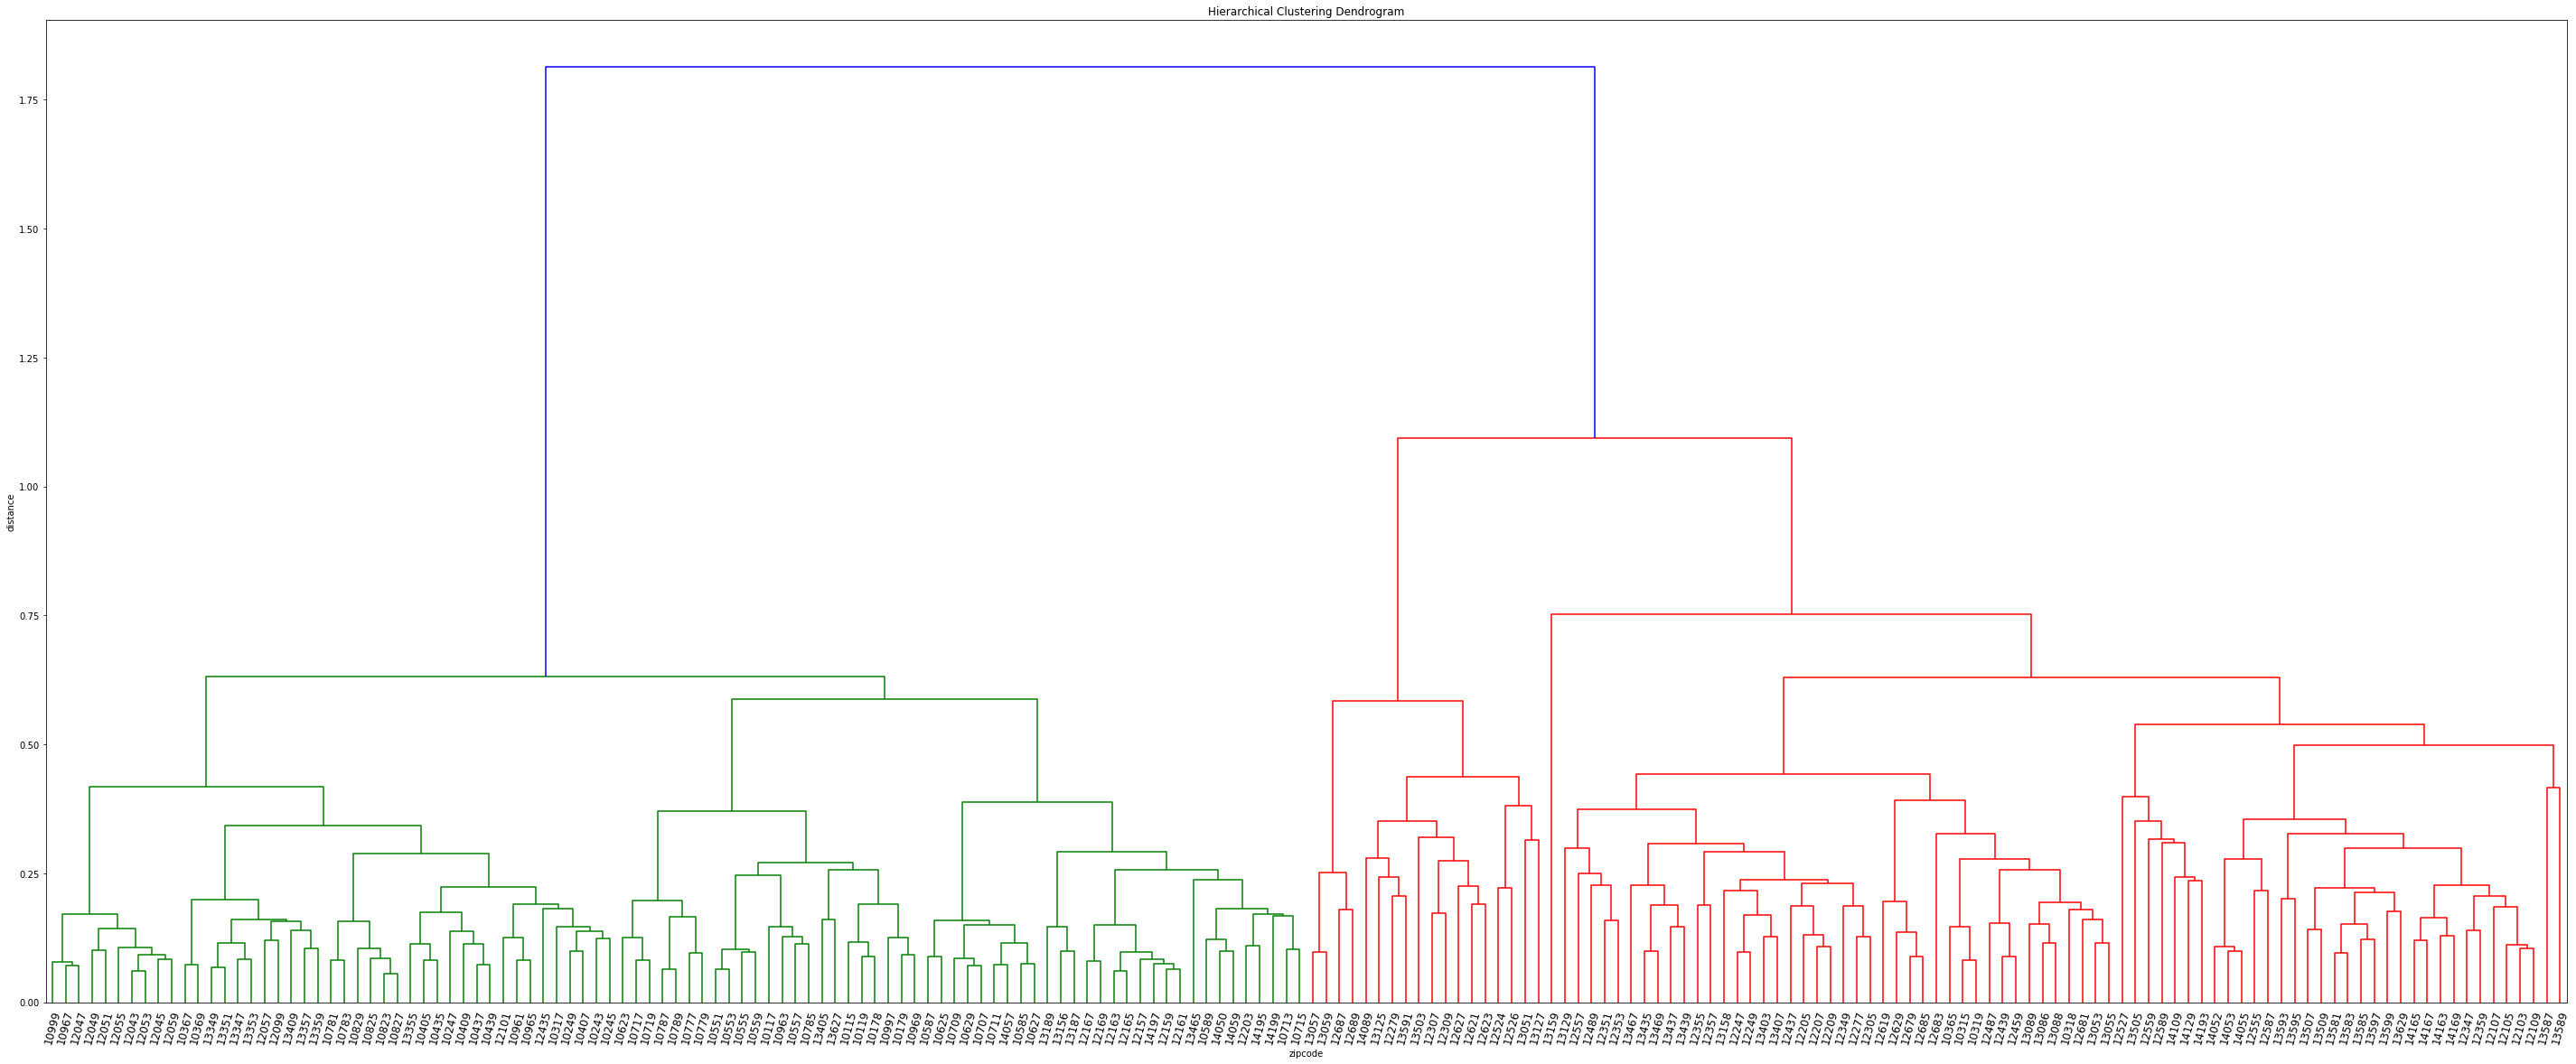

In [17]:
%matplotlib inline

Berlin_grouped_clustering = Berlin_grouped.drop('Zipcode', 1)

linkage_matrix = linkage(Berlin_grouped_clustering, 'ward')

# calculate full dendrogram
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('zipcode')
plt.ylabel('distance')

#from IPython.core.debugger import Tracer; 
# Tracer()()
dendrogram(
    linkage_matrix,
    #p=30, truncate_mode='lastp',
    labels=list ( Berlin_grouped['Zipcode']) ,
    leaf_rotation=75,  # rotates the x axis labels
    leaf_font_size=12  # font size for the x axis labels
    )

# double-click to maximize or minimize the plot
#fig = plt.gcf()
plt.show()

The dendogram shows a specific hierarchical structure. For a sparse parametrization, I use seven clusters (count the vertical lines at some offset over the horizotal line). I decided for two large green clusters (on the left in the dendrogram) and five red clusters (on the right in the dendrogram). With this number of clusters, I run the hierarchical cluster analysis to label each zipcode with a cluster-label of one to seven.

In [18]:
# generate cluster labels
k=7 # number of Clusters
labels = fcluster(linkage_matrix, k, criterion='maxclust')

# add clustering labels
Berlin_merged = pd.DataFrame(Berlin_grouped.loc[:,['Zipcode']]) #i.O.
Berlin_merged['Cluster Labels'] = labels

# combine with sorted venues dataframe
Berlin_merged = Berlin_merged.join( Berlin_mapped.loc[:,['zipcode','latitude','longitude','Borough']].set_index('zipcode'), on='Zipcode').join( neighborhoods_venues_sorted.set_index('Zipcode'),on='Zipcode')

Berlin_merged.head()

Zipcode  Cluster Labels  latitude  longitude Borough 1st Most Common Venue  \
0    10115               2   52.5323    13.3846   Mitte           Coffee Shop   
1    10117               2   52.5170    13.3872   Mitte                 Hotel   
2    10119               2   52.5305    13.4053   Mitte    Italian Restaurant   
3    10178               2   52.5213    13.4096   Mitte                 Hotel   
4    10179               2   52.5122    13.4164   Mitte           Coffee Shop   

  2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0    Italian Restaurant                  Hotel        Ice Cream Shop   
1        History Museum    Monument / Landmark           Art Gallery   
2           Coffee Shop               Beer Bar             Bookstore   
3           Coffee Shop  Vietnamese Restaurant        Ice Cream Shop   
4                 Hotel                   Café                   Bar   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Japanese Restaurant             Bookstore           Art Gallery   
1                  Plaza             Bookstore          Concert Hall   
2  Vietnamese Restaurant                 Hotel        Sandwich Place   
3         History Museum             Bookstore    Italian Restaurant   
4     Turkish Restaurant   Indie Movie Theater        History Museum   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Bakery          Cocktail Bar         Sandwich Place  
1           Coffee Shop        Clothing Store         Chocolate Shop  
2          Cocktail Bar        Ice Cream Shop      German Restaurant  
3        Sandwich Place   Indie Movie Theater                   Café  
4     German Restaurant    Italian Restaurant             Art Museum

As the dendrogram shows for example, the zipcodes "10115", "10117" and "10119" are part of the secound-green cluster (see the zipcode in the dendrogram). This table shows in column "Cluster Labels", that three zipcodes ("10115", "10117" and "10119") are clustered into the second cluster-label, as expected.

<a id="ref25"></a>
<h2>5. Examine clusters</h2>

<a id="ref3"></a>
<h1>Part 3 - Analysis</h1>

The following map visualizes the distribution of clustered zipcodes Berlin:


In [19]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# create a plain map of Berlin
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

Map_Berlin_clustered = folium.Map(location=[location.latitude, location.longitude], zoom_start=10.2)


Map_Berlin_clustered.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  PFAD im geojson JavaScript!!!!
    fill_color='YlGn', 
    legend_name='City of Berlin and clustered venues',
    highlight = True,
    line_color ='black'
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, clu, bor in zip(
     Berlin_merged['latitude'],
     Berlin_merged['longitude'],
     Berlin_merged['Zipcode'],
     Berlin_merged['Cluster Labels'],
     Berlin_merged['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}, Cluster {},  '.format(bor, poi, clu ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[clu-1],
        fill=True,
        fill_color=rainbow[clu-1],
        fill_opacity=0.7
    ).add_to(Map_Berlin_clustered)
       
Map_Berlin_clustered

F:\Python\Miniconda\envs\py35\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The map of the clustered locations show some geographical structure. I suggest to double-click and zoom in the map.

*Cluster 1* and *Cluster 2* (purple, blue) lie in the center of Berlin - predominantly more in the east respectively in the west. 
*Cluster 3* (cyan) is mainly located in southwest. 
Cluster 4* and *Cluster 6* (bright green, orange) are outside of the inner circle. *Cluster 5* (dark yellow) spands from the north over the east to the south - outside the inner circle, and *Cluster 7* is singular in the north.
Several clusters comprise multiple boroughs such as *Cluster 6* (orange), that contains zipcodes in Reinickendorf, Pankow, Lichtenberg, etc.

#### Describe the clusters

In this section, we present the clusters and determine the venues categories that distinguish the cluster.

In [20]:
# create structure for ranked venue categories
# created columns with ranked names
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns_ranked = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns_ranked.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns_ranked.append('{}th Most Common Venue'.format(ind+1))
columns_ranked


def get_ranked_venues( columns_ranked, Berlin_onehot, Clusterer_Zipcode ):
    
    # make one-hot encoding for venues in cluster
    Berlin_grouped_temp = Berlin_onehot [ Berlin_onehot['Zipcode'].isin( Clusterer_Zipcode ) ].groupby('Zipcode').mean().reset_index()
    
    # create a new dataframe with same zipcodes
    Cluster_ranked_venues = pd.DataFrame(columns=columns_ranked)
    Cluster_ranked_venues['Zipcode'] = Berlin_grouped_temp[ 'Zipcode']

    # rank venues by frequency
    for ind in np.arange(Berlin_grouped_temp.shape[0]):
        Cluster_ranked_venues.iloc[ind, 1:] = return_most_common_venues( Berlin_grouped_temp.iloc[ind, :], num_top_venues)

    return Cluster_ranked_venues


def show_popular_venues( Cluster_Label, Berlin_merged):

    # extract zipcode in cluster and get ranked venue categories by frequency 
    Cluster = Berlin_merged.loc[Berlin_merged['Cluster Labels'] == LABEL, Berlin_merged.columns[[0] + list(range(4, 14))]]
    
    # call the get_ranked_venues function
    Cluster_ranked_venues = get_ranked_venues( columns_ranked, Berlin_onehot, Cluster['Zipcode'] )

    # extract modes of ranked venues and delete nan
    top_venues  = [] 
    for row in Cluster_ranked_venues.mode(axis=0).copy().drop(columns = 'Zipcode').drop_duplicates().iterrows():
        top_venues.extend ( row[1].values )
    top_venues = [item for item in top_venues if type(item)==str]#

    # remove duplicates and order alphabetical
    top_venues = list ( sorted( set( top_venues )) )

    # show characteristic venues and survey of top ten venues of Cluster
    
    print ('Cluster{} contains {} zipcodes.\n'.format(LABEL, len( Cluster['Zipcode']) ))
    print ('The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):\n {}'.format( top_venues) )
    print ()
    print ('Show individual top ten venues categories in cluster{}:'.format(LABEL) )
    print ()
    display ( Cluster_ranked_venues )
    return Cluster_ranked_venues, top_venues

### Results: Cluster1 (purple):

Cluster1 lies in the middle of Berlin, and one might expect more venues for tourism, food, coffee, etc.

In [21]:
# Clusters = list[index][properties] as data structure for custers.\
# Index-1 is the lael of a cluster, properties are: 
# cluster label number,
# a dataframe with zipcodes and venues, 
# and a set of most frequent venue categories

Clusters = []

LABEL = 1
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster1 contains 43 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Bar', 'Café', 'Ice Cream Shop', 'Italian Restaurant', 'Middle Eastern Restaurant', 'Vietnamese Restaurant']

Show individual top ten venues categories in cluster1:



Zipcode 1st Most Common Venue          2nd Most Common Venue  \
0     10243    Italian Restaurant                         Bakery   
1     10245                  Café                      Nightclub   
2     10247                  Café                    Pizza Place   
3     10249    Italian Restaurant                           Café   
4     10317                   Bar             Italian Restaurant   
5     10367                  Café                           Park   
6     10369                  Café                    Pizza Place   
7     10405    Italian Restaurant                           Café   
8     10407                  Café             Italian Restaurant   
9     10409                  Café                 Ice Cream Shop   
10    10435                  Café                    Coffee Shop   
11    10437                  Café                    Coffee Shop   
12    10439                  Café                    Coffee Shop   
13    10781                  Café             Italian Restaurant   
14    10783                  Café                   Cocktail Bar   
15    10823                  Café                 Ice Cream Shop   
16    10825                  Café             Italian Restaurant   
17    10827                  Café             Italian Restaurant   
18    10829                  Café             Italian Restaurant   
19    10961    Italian Restaurant                    Coffee Shop   
20    10965    Italian Restaurant                            Bar   
21    10967                  Café                    Coffee Shop   
22    10999                   Bar                           Café   
23    12043                  Café                            Bar   
24    12045           Coffee Shop                            Bar   
25    12047                  Café                    Coffee Shop   
26    12049                   Bar                           Café   
27    12051                   Bar                           Café   
28    12053                   Bar                           Café   
29    12055                  Café                            Bar   
30    12057                  Café                            Bar   
31    12059                  Café                    Coffee Shop   
32    12099                  Café             Italian Restaurant   
33    12101                  Café             Italian Restaurant   
34    12435                  Café                      Nightclub   
35    13347                   Bar                           Café   
36    13349                  Café                            Bar   
37    13351                  Café                            Bar   
38    13353                   Bar                           Café   
39    13355           Coffee Shop  Vegetarian / Vegan Restaurant   
40    13357                   Bar                           Café   
41    13359                  Café                            Bar   
42    13409                  Café                            Bar   

            3rd Most Common Venue          4th Most Common Venue  \
0   Vegetarian / Vegan Restaurant                           Café   
1                  Ice Cream Shop  Vegetarian / Vegan Restaurant   
2                     Coffee Shop             Falafel Restaurant   
3             Indie Movie Theater                    Pizza Place   
4                            Café                         Bakery   
5                             Bar                         Bakery   
6                             Bar                           Park   
7                     Coffee Shop                       Beer Bar   
8           Vietnamese Restaurant                    Coffee Shop   
9             Japanese Restaurant             Italian Restaurant   
10                 Ice Cream Shop                       Beer Bar   
11                            Bar                 Ice Cream Shop   
12          Vietnamese Restaurant                            Bar   
13                          Hotel                    Men's 

The modes show the most frequent venue categories per rank over all zipcode without duplicates. Famous venues categories are: 'Bakery', 'Bar', 'Café', 'Ice Cream Shop' ... For details see table "Top ten venue categories".

### Results: Cluster2 (blue):

Cluster2 lies in the middle of Berlin like Cluster1. As the dendrogram implies, Cluster1 and Cluster2 share some specific similarities and have specific dissimmilarities.

In [22]:
LABEL = 2
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster2 contains 23 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Art Museum', 'Bakery', 'Bookstore', 'Café', 'Cocktail Bar', 'Coffee Shop', 'German Restaurant', 'History Museum', 'Hotel', 'Ice Cream Shop', 'Italian Restaurant', 'Japanese Restaurant', 'Movie Theater', 'Park', 'Plaza', 'Turkish Restaurant']

Show individual top ten venues categories in cluster2:



Zipcode 1st Most Common Venue 2nd Most Common Venue  \
0     10115           Coffee Shop    Italian Restaurant   
1     10117                 Hotel        History Museum   
2     10119    Italian Restaurant           Coffee Shop   
3     10178                 Hotel           Coffee Shop   
4     10179           Coffee Shop                 Hotel   
5     10551                  Café                   Bar   
6     10553                  Café                 Hotel   
7     10555                 Hotel                  Café   
8     10557                 Hotel                  Park   
9     10559                 Hotel                  Café   
10    10623                 Hotel     German Restaurant   
11    10717                 Hotel     German Restaurant   
12    10719                 Hotel     German Restaurant   
13    10777                 Hotel          Cocktail Bar   
14    10779                 Hotel                  Café   
15    10785                 Hotel   Monument / Landmark   
16    10787                 Hotel           Zoo Exhibit   
17    10789                 Hotel           Zoo Exhibit   
18    10963                 Hotel    Italian Restaurant   
19    10969           Coffee Shop                 Hotel   
20    10997           Coffee Shop                   Bar   
21    13405           Coffee Shop   Rental Car Location   
22    13627           Supermarket           Coffee Shop   

    3rd Most Common Venue       4th Most Common Venue  5th Most Common Venue  \
0                   Hotel              Ice Cream Shop    Japanese Restaurant   
1     Monument / Landmark                 Art Gallery                  Plaza   
2                Beer Bar                   Bookstore  Vietnamese Restaurant   
3   Vietnamese Restaurant              Ice Cream Shop         History Museum   
4                    Café                         Bar     Turkish Restaurant   
5                    Park                 Coffee Shop                  Hotel   
6   Vietnamese Restaurant                         Bar     Turkish Restaurant   
7             Zoo Exhibit       Vietnamese Restaurant                   Park   
8     Monument / Landmark                 Beer Garden           Cocktail Bar   
9                     Bar                        Park            Coffee Shop   
10            Zoo Exhibit          Italian Restaurant          Movie Theater   
11                   Café            Greek Restaurant    Japanese Restaurant   
12                   Café              Breakfast Spot                 Bakery   
13                   Café                 Men's Store            Coffee Shop   
14         Ice Cream Shop                Cocktail Bar                  Plaza   
15           Cocktail Bar                        Café             Art Museum   
16             Art Museum                        Café            Men's Store   
17                   Café           German Restaurant          Movie Theater   
18                    Bar  Modern European Restaurant           Cocktail Bar   
19                    Bar                        Café         History Museum   
20                   Café          Italian Restaurant                 Bakery   
21                Airport              Sandwich Place              BBQ Joint   
22                   Café                 Beer Garden    Rental Car Location   

         6th Most Common Venue  7th Most Common Venue   8th Most Common Venue  \
0                    Bookstore            Art Gallery                  Bakery   
1                    Bookstore           Concert Hall             Coffee Shop   
2                        Hotel         Sandwich Place            Cocktail Bar   
3                    Bookstore     Italian Restaurant          Sandwich Place   
4          Indie Movie Theater         History Museum       German Restaurant   
5                 Cocktail Bar      Indian Restaurant      Turkish Restaurant   
6                  Supermarket       Asian Restaurant                 Taverna   
7                 

The mode shows the most frequent venue categories per rank over all zipcode without duplicates. 

Let's find the simmilarities and dissimmilarities of Cluster1 and Cluster2. For details see table "Top ten venues categories" regarding  Cluster2.

In [23]:
print ('Similarities of Cluster1 and Cluster2:')
set ( Clusters[0][2] ).intersection (set (Clusters[1][2]) )

Similarities of Cluster1 and Cluster2:


{'Bakery', 'Café', 'Ice Cream Shop', 'Italian Restaurant'}

In [24]:
print ('Specific for Cluster2:')
set ( Clusters[1][2] ).difference (set (Clusters[0][2]) )

Specific for Cluster2:


{'Art Museum',
 'Bookstore',
 'Cocktail Bar',
 'Coffee Shop',
 'German Restaurant',
 'History Museum',
 'Hotel',
 'Japanese Restaurant',
 'Movie Theater',
 'Park',
 'Plaza',
 'Turkish Restaurant'}

In [25]:
print ('Specific for Cluster1:')
set ( Clusters[0][2] ).difference (set (Clusters[1][2]) )

Specific for Cluster1:


{'Bar', 'Middle Eastern Restaurant', 'Vietnamese Restaurant'}

### Results: Cluster4 (light green):

Cluster4 and Cluster6 encompass the center of Berlin. For both venues, more venue categories concerning living, household, sport, etc. are expected to characterize these areas.

In [26]:
LABEL = 4
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster4 contains 18 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Bus Stop', 'Chinese Restaurant', 'Drugstore', 'Fast Food Restaurant', 'Gym / Fitness Center', 'History Museum', 'Hotel', 'Italian Restaurant', 'Light Rail Station', 'Park', 'Pet Store', 'Supermarket', 'Tram Station']

Show individual top ten venues categories in cluster4:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     12279           Supermarket              Bus Stop    Italian Restaurant   
1     12307           Supermarket                Bakery     German Restaurant   
2     12309           Supermarket    Italian Restaurant          Soccer Field   
3     12524           Supermarket     Electronics Store     Outdoor Sculpture   
4     12526           Supermarket                 Hotel             Drugstore   
5     12621           Supermarket             Drugstore    Italian Restaurant   
6     12623           Supermarket    Italian Restaurant             Drugstore   
7     12627           Supermarket         Metro Station              Bus Stop   
8     12687           Supermarket          Tram Station              Bus Stop   
9     12689           Supermarket          Tram Station            Steakhouse   
10    13051           Supermarket         Shopping Mall          Tram Station   
11    13057           Supermarket          Tram Station          Home Service   
12    13059           Supermarket          Tram Station           Coffee Shop   
13    13125           Supermarket              Bus Stop    Italian Restaurant   
14    13127           Supermarket       Nature Preserve                  Farm   
15    13503           Supermarket      Insurance Office    Light Rail Station   
16    13591           Supermarket              Bus Stop             Drugstore   
17    14089           Supermarket              Bus Stop     Food & Drink Shop   

        4th Most Common Venue   5th Most Common Venue   6th Most Common Venue  \
0        Fast Food Restaurant                    Farm                    Park   
1                    Bus Stop             Gas Station               Drugstore   
2                        Café                  Bakery       German Restaurant   
3   Middle Eastern Restaurant               Drugstore      Miscellaneous Shop   
4   Middle Eastern Restaurant        Greek Restaurant         Auto Dealership   
5                      Bakery           Indie Theater          Ice Cream Shop   
6        Fast Food Restaurant  Furniture / Home Store    Gym / Fitness Center   
7               Shopping Mall               Drugstore       Electronics Store   
8                  Steakhouse               Drugstore        Greek Restaurant   
9               Train Station                Mountain               Pet Store   
10                 Restaurant             Golf Course      Chinese Restaurant   
11               Soccer Field           Train Station          Animal Shelter   
12              Movie Theater          Animal Shelter      Light Rail Station   
13                Art Gallery         Nature Preserve  Furniture / Home Store   
14             Hardware Store            Tram Station               Drugstore   
15          Trattoria/Osteria             Gas Station                  Forest   
16       Fast Food Restaurant       Trattoria/Osteria               Pet Store   
17                       Café             Golf Course           Historic Site   

   7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
0           Soccer Field    Chinese Restaurant                   Diner   
1      Mobile Phone Shop                  Café      Light Rail Station   
2     Miscellaneous Shop  Gym / Fitness Center       Mobile Phone Shop   
3     Light Rail Station                  Park                  Bakery   
4     Light Rail Station         Shopping Mall             Zoo Exhibit   
5                  Hotel                  Lake      Light Rail Station   
6                   Lake                Bakery             Gas Station   
7                  Hotel         Big Box Store    Fast Food Restaurant   
8      Electronics Store           Gas Station      Light Rail Station   
9         Animal Shelter                  Park      Light Rail Station   
10                  Farm    Light Rail Station            Soccer Field   
11              Bus Stop           C

The venue categories differ from cluster1 or cluster2. Some typical venue categories are: 'Bus Stop', 'Gas Station', 'Baby Store', 'Bakery', 'Café', 'Drugstore', 'Supermarket'
That supports the expectation. Now consider Cluster6:

### Results: Cluster6 (orange):

Cluster6 lies outside the center of Berlin, and may share some commonalities with Cluster4, as the dendrogram suggests.

In [27]:
LABEL = 6
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster6 contains 34 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Beer Garden', 'Bus Stop', 'Café', 'Drugstore', 'German Restaurant', 'Greek Restaurant', 'Hotel', 'Italian Restaurant', 'Park', 'Plaza', 'Soccer Field', 'Supermarket']

Show individual top ten venues categories in cluster6:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     12103           Supermarket                  Park                  Café   
1     12105           Supermarket                  Park                  Café   
2     12107           Supermarket    Italian Restaurant                  Park   
3     12109           Supermarket             Drugstore                  Café   
4     12347           Supermarket                  Café         Historic Site   
5     12359           Supermarket                 Hotel                  Park   
6     12527           Gas Station    Italian Restaurant         Boat or Ferry   
7     12555     German Restaurant          Tram Station    Light Rail Station   
8     12559           Supermarket       Harbor / Marina     German Restaurant   
9     12587      Asian Restaurant        Ice Cream Shop           Gas Station   
10    12589     German Restaurant                 Beach           Supermarket   
11    13505     German Restaurant         Boat or Ferry                 Beach   
12    13507             Drugstore                  Café  Fast Food Restaurant   
13    13509           Supermarket            Restaurant    Italian Restaurant   
14    13581              Bus Stop             Drugstore           Supermarket   
15    13583           Supermarket             Drugstore    Italian Restaurant   
16    13585           Supermarket     German Restaurant    Italian Restaurant   
17    13587              Bus Stop                Forest                   Zoo   
18    13589              Bus Stop             Drugstore                  Lake   
19    13593              Bus Stop       Harbor / Marina           Supermarket   
20    13595              Bus Stop           Supermarket           Pizza Place   
21    13597        Soccer Stadium           Supermarket           Pizza Place   
22    13599     German Restaurant              Bus Stop           Supermarket   
23    13629              Bus Stop         Metro Station            Restaurant   
24    14052        Soccer Stadium                 Hotel                 Plaza   
25    14053        Soccer Stadium           Supermarket                  Café   
26    14055        Soccer Stadium                  Café     German Restaurant   
27    14109     German Restaurant           Supermarket       Harbor / Marina   
28    14129                 Beach     German Restaurant           Supermarket   
29    14163           Supermarket    Italian Restaurant                  Café   
30    14165           Supermarket    Italian Restaurant                  Café   
31    14167           Supermarket                  Café    Italian Restaurant   
32    14169                  Café           Supermarket  Gym / Fitness Center   
33    14193     German Restaurant                  Lake         Historic Site   

     4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
0       Italian Restaurant             Drugstore         Gym / Fitness Center   
1       Italian Restaurant             Drugstore             Asian Restaurant   
2               Steakhouse              Bus Stop          Fried Chicken Joint   
3       Italian Restaurant                  Park                       Bakery   
4                 Bus Stop                  Park                  Gas Station   
5     Gym / Fitness Center          Soccer Field         Fast Food Restaurant   
6             Tram Station    Light Rail Station            German Restaurant   
7                     Café             Drugstore            Electronics Store   
8            Bowling Alley                 Beach          American Restaurant   
9        Trattoria/Osteria          Tram Station                Train Station   
10      Light Rail Station    Seafood Restaurant                 Neighborhood   
11                    Café             Gastropub                  Gas Station   
12           Shopping Mall        Sandwich Place               Clothing Store   
13           Metro Station     Ger

Regarding the mode of the top ranked venue categories, we find a lot of expected venue categories: 'Bakery', 'Bus Stop', 'Café', 'Drugstore', 'Gas Station', 'Gym / Fitness Center', 'Park', 'Supermarket'.  Let's find the simmilarities and dissimmilarities of Cluster4 and Cluster6. See table "Top ten venues categories" for details of Cluster2.

In [28]:
print ('Similarities of Cluster4 and Cluster6:')
set ( Clusters[2][2] ).intersection (set (Clusters[3][2]) )

Similarities of Cluster4 and Cluster6:


{'Bus Stop', 'Drugstore', 'Hotel', 'Italian Restaurant', 'Park', 'Supermarket'}

In [29]:
print ('Specific for Cluster4:')
set ( Clusters[2][2] ).difference (set (Clusters[3][2]) )

Specific for Cluster4:


{'Bakery',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Gym / Fitness Center',
 'History Museum',
 'Light Rail Station',
 'Pet Store',
 'Tram Station'}

In [30]:
print ('Specific for Cluster6:')
set ( Clusters[3][2] ).difference (set (Clusters[2][2]) )

Specific for Cluster6:


{'Beer Garden',
 'Café',
 'German Restaurant',
 'Greek Restaurant',
 'Plaza',
 'Soccer Field'}

### Results: Cluster5 (dark yellow):

Regionally, cluster5 is next cluster4 in the suburbs of Berlin. There should be some simmilarities to cluster4.

In [31]:
LABEL = 5
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster5 contains 42 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Drugstore', 'Greek Restaurant', 'Italian Restaurant', 'Light Rail Station', 'Park', 'Supermarket']

Show individual top ten venues categories in cluster5:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     10315           Supermarket           Zoo Exhibit                Bakery   
1     10318           Supermarket          Tram Station             Drugstore   
2     10319           Supermarket                Bakery             Drugstore   
3     10365           Supermarket                Bakery           Coffee Shop   
4     12205           Supermarket    Italian Restaurant              Bus Stop   
5     12207           Supermarket              Bus Stop             Drugstore   
6     12209           Supermarket              Bus Stop    Italian Restaurant   
7     12247           Supermarket                  Park    Italian Restaurant   
8     12249           Supermarket    Italian Restaurant             Drugstore   
9     12277           Supermarket    Italian Restaurant    Chinese Restaurant   
10    12305           Supermarket    Italian Restaurant    Light Rail Station   
11    12349           Supermarket    Italian Restaurant              Bus Stop   
12    12351           Supermarket     German Restaurant           Gas Station   
13    12353           Supermarket  Fast Food Restaurant              Bus Stop   
14    12355           Supermarket    Italian Restaurant             Drugstore   
15    12357           Supermarket         Metro Station    Italian Restaurant   
16    12437           Supermarket              Bus Stop             Drugstore   
17    12439           Supermarket                  Café             Drugstore   
18    12459           Supermarket             Drugstore                  Café   
19    12487           Supermarket                Forest             Drugstore   
20    12489           Supermarket                 Hotel                  Café   
21    12557           Supermarket                  Café     German Restaurant   
22    12619           Supermarket                Garden                 Plaza   
23    12629           Supermarket                Garden          Tram Station   
24    12679           Supermarket                Garden          Tram Station   
25    12681           Supermarket          Tram Station             Drugstore   
26    12683           Zoo Exhibit           Supermarket             Drugstore   
27    12685           Supermarket          Tram Station                Garden   
28    13053           Supermarket          Tram Station  Fast Food Restaurant   
29    13055          Tram Station           Supermarket                 Hotel   
30    13086           Supermarket                  Café     German Restaurant   
31    13088           Supermarket          Tram Station     German Restaurant   
32    13089           Supermarket          Tram Station             Drugstore   
33    13129           Gas Station           Supermarket             Pet Store   
34    13158           Supermarket          Tram Station                  Park   
35    13403           Supermarket              Bus Stop                Bakery   
36    13407           Supermarket                  Park         Metro Station   
37    13435           Supermarket    Italian Restaurant  Gym / Fitness Center   
38    13437           Supermarket    Light Rail Station  Gym / Fitness Center   
39    13439           Supermarket              Bus Stop    Athletics & Sports   
40    13467           Supermarket    Italian Restaurant      Sushi Restaurant   
41    13469           Supermarket  Fast Food Restaurant  Gym / Fitness Center   

          4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0                     Drugstore                   Hotel                  Park   
1            Italian Restaurant                  Bakery                  Café   
2                   Zoo Exhibit             Pizza Place    Italian Restaurant   
3                          Park               Drugstore                 Hotel   
4                     Drugstore                    Café        Ice Cream Shop   
5            Italian Restaurant   

A lot of the top ranked venue categories of cluster5 are not typical for cluster1 or cluster2. But some of those categories are part of the top categories in cluster4.

### Results: Cluster3 (cyan):

Cluster3 is in the east of Berlin.

In [32]:
LABEL = 3
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster3 contains 29 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Ice Cream Shop', 'Italian Restaurant', 'Korean Restaurant', 'Park', 'Supermarket', 'Thai Restaurant', 'Trattoria/Osteria', 'Vietnamese Restaurant']

Show individual top ten venues categories in cluster3:



Zipcode 1st Most Common Venue 2nd Most Common Venue  \
0     10585                  Café    Italian Restaurant   
1     10587                 Hotel                  Café   
2     10589                  Café           Coffee Shop   
3     10625     German Restaurant                 Hotel   
4     10627                  Café    Italian Restaurant   
5     10629    Italian Restaurant                  Café   
6     10707    Italian Restaurant     German Restaurant   
7     10709    Italian Restaurant                 Hotel   
8     10711    Italian Restaurant                  Café   
9     10713    Italian Restaurant                Bakery   
10    10715                  Café    Italian Restaurant   
11    12157                  Café    Italian Restaurant   
12    12159                  Café        Ice Cream Shop   
13    12161                  Café        Ice Cream Shop   
14    12163                  Café        Ice Cream Shop   
15    12165                  Café        Ice Cream Shop   
16    12167           Supermarket        Ice Cream Shop   
17    12169                  Café        Ice Cream Shop   
18    12203                  Café    Italian Restaurant   
19    13156                  Café           Supermarket   
20    13187                  Café           Supermarket   
21    13189                  Café    Italian Restaurant   
22    13465                  Café     German Restaurant   
23    14050                  Café    Italian Restaurant   
24    14057                  Café    Italian Restaurant   
25    14059                  Café    Italian Restaurant   
26    14195    Italian Restaurant     German Restaurant   
27    14197                  Café    Italian Restaurant   
28    14199    Italian Restaurant                  Café   

    3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue  \
0   Vietnamese Restaurant       Asian Restaurant           Gourmet Shop   
1              Art Museum  Vietnamese Restaurant     Chinese Restaurant   
2      Italian Restaurant       Asian Restaurant      Trattoria/Osteria   
3      Italian Restaurant     Chinese Restaurant  Vietnamese Restaurant   
4       German Restaurant  Vietnamese Restaurant           Gourmet Shop   
5       German Restaurant  Vietnamese Restaurant                  Hotel   
6                   Hotel         Breakfast Spot                   Café   
7          Breakfast Spot                   Café      German Restaurant   
8       German Restaurant  Vietnamese Restaurant                 Bakery   
9                    Park                   Café       Greek Restaurant   
10         Ice Cream Shop      German Restaurant                 Bakery   
11         Ice Cream Shop   Gym / Fitness Center       Sushi Restaurant   
12     Italian Restaurant                 Bakery  Vietnamese Restaurant   
13     Italian Restaurant       Sushi Restaurant                   Park   
14     Italian Restaurant       Sushi Restaurant  Vietnamese Restaurant   
15     Italian Restaurant                   Park            Supermarket   
16                   Café     Italian Restaurant       Sushi Restaurant   
17            Supermarket                   Park       Sushi Restaurant   
18      German Restaurant         Ice Cream Shop            Supermarket   
19                   Park              Drugstore                 Bakery   
20                 Bakery                   Park              Drugstore   
21                    Bar              Drugstore     Chinese Restaurant   
22                   Park            Supermarket     Italian Restaurant   
23            Supermarket      Trattoria/Osteria             Art Museum   
24      German Restaurant  Vietnamese Restaurant        Thai Restaurant   
25      Trattoria/Osteria  Vietnamese Restaurant      German Restaurant   
26                   Café                 Bakery            Supermarket   
27            Supermarket         Ice Cream Shop       Greek Restaurant   
28      Trattoria/Osteria                  Hotel          

The modes show the most frequent venue categories per rank over all zipcode without duplicates. Some famous venues categories encompass public transport, free time, etc.

### Results: Cluster7 (red):

Cluster7 lies in the north of Berlin.

In [33]:
LABEL = 7
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster7 contains 1 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bus Stop', 'Dog Run', 'Ethiopian Restaurant', 'Event Service', 'Event Space', 'Fabric Shop', 'Fair', 'Farm', 'Fast Food Restaurant', 'Lake']

Show individual top ten venues categories in cluster7:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    13159                  Lake              Bus Stop               Dog Run   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Farm  Fast Food Restaurant  Ethiopian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Event Service           Event Space           Fabric Shop   

  10th Most Common Venue  
0                   Fair

<a id="ref26"></a>
<h2>6. Survey socio-demographic features</h2>

Implement several data sources as four feature:

In [34]:
Data_Socio = pd.DataFrame(
{'Borough': {0: 'Mitte',
  1: 'Friedrichshain-Kreuzberg',
  2: 'Pankow',
  3: 'Charlottenburg-Wilmersdorf',
  4: 'Spandau',
  5: 'Steglitz-Zehlendorf',
  6: 'Tempelhof-Schöneberg',
  7: 'Neukölln',
  8: 'Treptow-Köpenick',
  9: 'Marzahn-Hellersdorf',
  10: 'Lichtenberg',
  11: 'Reinickendorf'},
 'inhabitant per physician': {0: 1226.7085199548148, # see GSI Indicator 8.8
  1: 1347.8007515546017,
  2: 1428.6484874927282,
  3: 774.2094040100087,
  4: 1732.8049904946831,
  5: 1130.6173148789412,
  6: 1259.4874102399701,
  7: 1880.1804980828365,
  8: 1747.5640427154844,
  9: 1630.636667703105,
  10: 1776.1602467160765,
  11: 1659.7076540821038},
 'rate of academics (%)': {0: 30.688788135531624, # see GSI Indicator 2.14
  1: 35.27718446448674,
  2: 31.51962642843833,
  3: 33.28059898598717,
  4: 12.101906995546543,
  5: 31.735383374408638,
  6: 24.4033322360486,
  7: 17.319811712465196,
  8: 22.021023903567794,
  9: 14.5405735263213,
  10: 18.10910640426594,
  11: 16.877523123599968},
 'rate of unemployment (%)': # see GSI Indicator 2.21
 {0: 7.68826168786094,
  1: 6.763835535868547,
  2: 5.037218458646751,
  3: 5.691221170121538,
  4: 8.067715480518467,
  5: 4.296897836404318,
  6: 6.192141890460357,
  7: 8.628163151685468,
  8: 5.425356638190336,
  9: 6.182131014915509,
  10: 6.240764016344733,
  11: 6.236549962507544}}
)

Data_Socio.dtypes

Borough                      object
inhabitant per physician    float64
rate of academics (%)       float64
rate of unemployment (%)    float64
dtype: object

In [35]:
Data_Price = pd.DataFrame(
{'Borough': {0: 'Charlottenburg-Wilmersdorf',
  1: 'Friedrichshain-Kreuzberg',
  2: 'Lichtenberg',
  3: 'Marzahn-Hellersdorf',
  4: 'Mitte',
  5: 'Neukölln',
  6: 'Pankow',
  7: 'Reinickendorf',
  8: 'Spandau',
  9: 'Steglitz-Zehlendorf',
  10: 'Tempelhof-Schöneberg',
  11: 'Treptow-Köpenick'},
 'house price (€/sqrmeter)': {0: 5718.1625,
  1: 4962.225,
  2: 3628.7839999999997,
  3: 3034.206,
  4: 5669.803333333333,
  5: 3657.35,
  6: 4158.94625,
  7: 3388.744444444444,
  8: 3011.2499999999995,
  9: 4881.078571428572,
  10: 3753.8766666666666,
  11: 3561.2078571428574}}
)

Data_Price.dtypes

Borough                      object
house price (€/sqrmeter)    float64
dtype: object

In [36]:
Data_merged= Data_Socio.merge(Data_Price, how='inner', on='Borough').round(decimals=2)
Data_merged.set_index('Borough',inplace=True,drop=True)
Data_merged

inhabitant per physician  rate of academics (%)  \
Borough                                                                       
Mitte                                        1226.71                  30.69   
Friedrichshain-Kreuzberg                     1347.80                  35.28   
Pankow                                       1428.65                  31.52   
Charlottenburg-Wilmersdorf                    774.21                  33.28   
Spandau                                      1732.80                  12.10   
Steglitz-Zehlendorf                          1130.62                  31.74   
Tempelhof-Schöneberg                         1259.49                  24.40   
Neukölln                                     1880.18                  17.32   
Treptow-Köpenick                             1747.56                  22.02   
Marzahn-Hellersdorf                          1630.64                  14.54   
Lichtenberg                                  1776.16                  18.11   
Reinickendorf                                1659.71                  16.88   

                            rate of unemployment (%)  house price (€/sqrmeter)  
Borough                                                                         
Mitte                                           7.69                   5669.80  
Friedrichshain-Kreuzberg                        6.76                   4962.23  
Pankow                                          5.04                   4158.95  
Charlottenburg-Wilmersdorf                      5.69                   5718.16  
Spandau                                         8.07                   3011.25  
Steglitz-Zehlendorf                             4.30                   4881.08  
Tempelhof-Schöneberg                            6.19                   3753.88  
Neukölln                                        8.63                   3657.35  
Treptow-Köpenick                                5.43                   3561.21  
Marzahn-Hellersdorf                             6.18                   3034.21  
Lichtenberg                                     6.24                   3628.78  
Reinickendorf                                   6.24                   3388.74

Show figures grouped by boroughs:

F:\Python\Miniconda\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


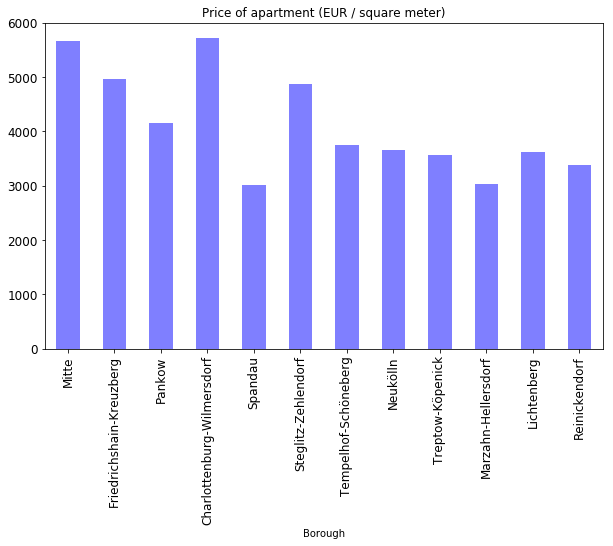

In [37]:
%matplotlib inline

bar_color = ['b']*12

figS1 = plt.figure()
ax1 = Data_merged['house price (€/sqrmeter)'].plot(kind='bar',
                #subplots=True, layout=(4, 1), 
                alpha=0.5, title ="Price of apartment (EUR / square meter)", figsize=(10, 6),
                #legend=True,
                color = bar_color,
                fontsize=12)
figS1.show()

F:\Python\Miniconda\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


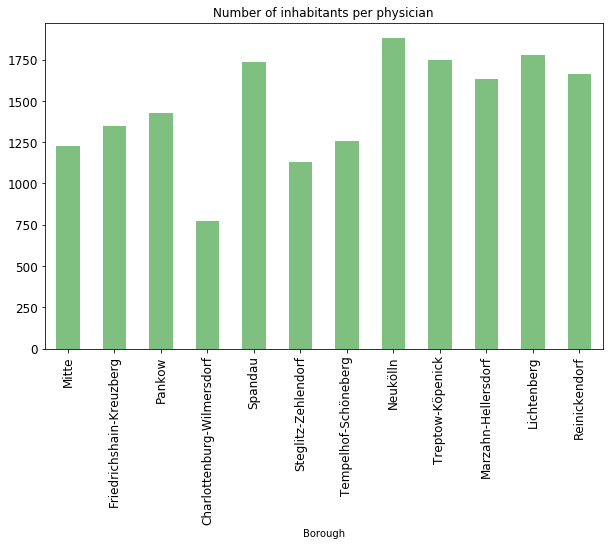

In [38]:
bar_color = ['g']*12

figS2 = plt.figure()
ax2 = Data_merged['inhabitant per physician'].plot(kind='bar',
                #subplots=True, layout=(4, 1), 
                alpha=0.5, title ="Number of inhabitants per physician", figsize=(10, 6),
                #legend=True,
                color = bar_color,
                fontsize=12)
figS2.show()

F:\Python\Miniconda\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


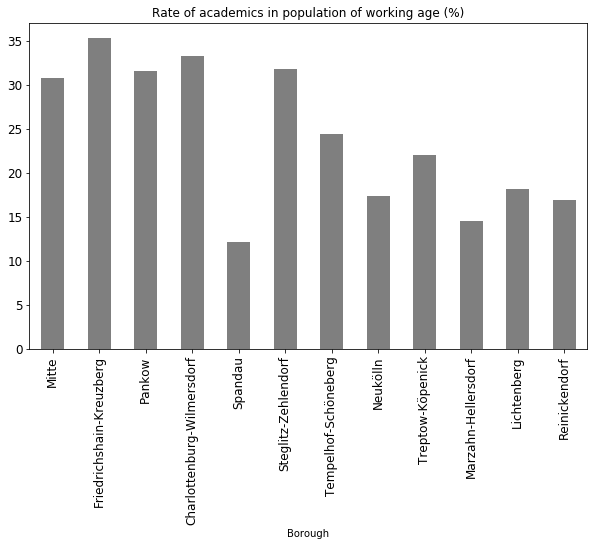

In [39]:
bar_color = ['k']*12

figS3 = plt.figure()
ax3 = Data_merged['rate of academics (%)'].plot(kind='bar',
                #subplots=True, layout=(4, 1), 
                alpha=0.5, title ="Rate of academics in population of working age (%)", figsize=(10, 6),
                #legend=True,
                color = bar_color,
                fontsize=12)
figS3.show()

F:\Python\Miniconda\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


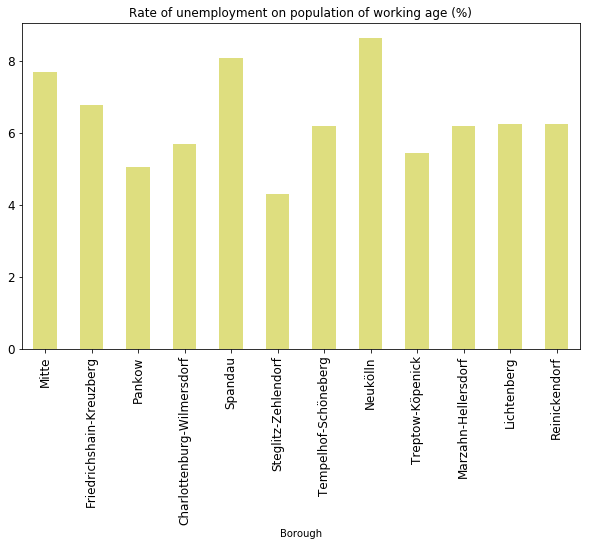

In [40]:
bar_color = ['y']*12

figS4 = plt.figure()
ax4 = Data_merged['rate of unemployment (%)'].plot(kind='bar',
                #subplots=True, layout=(4, 1), 
                alpha=0.5, title ="Rate of unemployment on population of working age (%)", figsize=(10, 6),
                #legend=True,
                color = bar_color,
                fontsize=12)
figS4.show()

<a id="ref27"></a>
<h2>7. Explore top rated venues</h2>

In [41]:
def get_top_venue(names, latitudes, longitudes, boroughs):
    
    API_KEY= '7ck9FFncp_Txch8yQlU1SINYI3ZPBkirqsa04kEKAodHh79szVNnfxAIFvl7Yc4GAkYKO7PfYMPeUjY3F2DqgvDCZ8oGjl3yaYVpoJOOlq8QcLJK_Acu25SPXUnGW3Yx'
    
    API_HOST = 'https://api.yelp.com'
        
    SEARCH_PATH = '/v3/businesses/search'
    
    url = '{0}{1}'.format(API_HOST, quote(SEARCH_PATH.encode('utf8')))
    
    html= "<table> <tr><td rowspan='5'><a href={Url} target='_blank'><img src={Img_Url} width='100'/> </a> </td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Name}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Adresse}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Rating}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Kategorie}</td></tr></table>"

    url_params = {
        'latitude': 0, 
        'longitude': 0,
        'radius': 1000,
        'sort_by': 'rating',
        'limit': 3, #'attributes': 'hot_and_new',
        }

    for name, lat, lng, bor in zip(names, latitudes, longitudes, boroughs):
        try:
            url_params['latitude'] =  lat
            url_params['longitude'] = lng
            response = requests.request('GET', url, headers={'Authorization': 'Bearer %s' % API_KEY,}, params=url_params)
            results =  response.json()
            Label = '<H3>Top venues in "{}" for zipcode {}:</H3>'.format(bor, name)
            display(HTML( Label ))
            for v in results['businesses']:
                datatable='<p>'
                datatable += html.format(
                    Url = str(v['url']), 
                    Img_Url = str(v['image_url']), 
                    Name = '<b>Name:</b> ' + str(v['name']), 
                    Adresse='<b>Address:</b> ' + ', '.join(v['location']['display_address']), 
                    Rating='<b>Rating:</b> ' + str( v['rating'] ),
                    Kategorie='<b>Category:</b> ' + str(v['categories'][0]['title']) )
                display(HTML(datatable))
        except:
            print ('Yelp returned top rated venues for zip.'.format(name))
            print ()
        print('-'*40) 
    return datatable

In [43]:
Berlin_selected = Berlin_mapped[2:5] # sparse use of API, volume constraint

display(HTML('<H2>Survey of top rated venues</H2><p>Click image to open the link!<p>'))

Selected_top_venues = get_top_venue( 
    Berlin_selected.loc[:,'zipcode'],
    Berlin_selected.loc[:,'latitude'],
    Berlin_selected.loc[:,'longitude'],
    Berlin_selected.loc[:,'Borough'])

#Selected_top_venues.to_pickle('./Selected_top_venues.pkl')

----------------------------------------


----------------------------------------


----------------------------------------


<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3"></a>
<h1>Part 3 - Analysis</h1>

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3d"></a>
<h2>D. Results</h2>

This section summariezes the results of the analysis of the neighborhood regarding the following aspects:
1. Geographic features of Berlin
2. Venues and clusters in neighborhoods
3. Socio-demographic features
4. Trending venues

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
#### 1. Geographic features of Berlin

In [44]:
# Show fundamental data set of Berlin, concerning zipcodes, coordinates and boroughs.
# Further make plausibility checks of data

display('Some locations in Berlin - zipcodes, cooordinates and boroughs')
display( Berlin_mapped.head(20) )
print()
display('Desciptive statistics:')
display ( Berlin_mapped.describe(include='all') )

'Some locations in Berlin - zipcodes, cooordinates and boroughs'

zipcode   state  latitude  longitude                   Borough
0     10115  Berlin   52.5323    13.3846                     Mitte
1     10117  Berlin   52.5170    13.3872                     Mitte
2     10119  Berlin   52.5305    13.4053                     Mitte
3     10178  Berlin   52.5213    13.4096                     Mitte
4     10179  Berlin   52.5122    13.4164                     Mitte
5     10243  Berlin   52.5123    13.4394  Friedrichshain-Kreuzberg
6     10245  Berlin   52.5007    13.4647  Friedrichshain-Kreuzberg
7     10247  Berlin   52.5161    13.4656  Friedrichshain-Kreuzberg
8     10249  Berlin   52.5238    13.4428  Friedrichshain-Kreuzberg
9     10315  Berlin   52.5132    13.5148               Lichtenberg
10    10317  Berlin   52.4979    13.4908               Lichtenberg
11    10318  Berlin   52.4835    13.5287               Lichtenberg
12    10319  Berlin   52.4992    13.5188               Lichtenberg
13    10365  Berlin   52.5206    13.4969               Lichtenberg
14    10367  Berlin   52.5246    13.4821  Friedrichshain-Kreuzberg
15    10369  Berlin   52.5295    13.4695               Lichtenberg
16    10405  Berlin   52.5352    13.4257                    Pankow
17    10407  Berlin   52.5336    13.4492                    Pankow
18    10409  Berlin   52.5443    13.4414                    Pankow
19    10435  Berlin   52.5378    13.4112                     Mitte

'Desciptive statistics:'

zipcode   state    latitude   longitude  \
count     190.000000     190  190.000000  190.000000   
unique           NaN       1         NaN         NaN   
top              NaN  Berlin         NaN         NaN   
freq             NaN     190         NaN         NaN   
mean    12215.642105     NaN   52.504641   13.387252   
std      1246.565015     NaN    0.054246    0.109935   
min     10115.000000     NaN   52.385600   13.140500   
25%     10797.500000     NaN   52.465925   13.314725   
50%     12352.000000     NaN   52.502750   13.380200   
75%     13350.500000     NaN   52.541525   13.452650   
max     14199.000000     NaN   52.639900   13.703400   

                           Borough  
count                          190  
unique                          12  
top     Charlottenburg-Wilmersdorf  
freq                            30  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            NaN

Show the shape of Berlin and draw boroughs and locate zipcodes.

In [45]:
print('Discover the gray shaded polygons to highlight boroughs and zipcodes.\nMove mouse of shaded areas, click on a blue point or zoom!')
Map_Berlin

Discover the gray shaded polygons to highlight boroughs and zipcodes.
Move mouse of shaded areas, click on a blue point or zoom!


<div align="right"><a href="#ToC">Return to Table of Content</a></div>
#### 2. Venues and cluster analysis

In [46]:
print('There are {0} total venues, and {1} uniques categories.'.format( \
    Berlin_Venues_grouped['Venue'].sum(), len( Berlin_Venues['Venue Category'].unique()) ))
print ()
print('Some example venues in Berlin:')
display( Berlin_Venues.loc[0:4,['Zipcode', 'Venue', 'Venue Category']] )
print ()
print('Descriptive statistics for plausibility checks:')
display( Berlin_Venues.describe(include='all') )

There are 13469 total venues, and 367 uniques categories.

Some example venues in Berlin:


Zipcode                          Venue              Venue Category
0    10115                  Oslo Kaffebar                 Coffee Shop
1    10115                      Hotel i31                       Hotel
2    10115  Brasserie La Bonne Franquette                   Brasserie
3    10115                      reinstoff  Modern European Restaurant
4    10115                        19grams                 Coffee Shop


Descriptive statistics for plausibility checks:


Venue Venue Category  Venue Latitude  Venue Longitude       Zipcode  \
count   13469          13469    13469.000000     13469.000000  13469.000000   
unique   4161            367             NaN              NaN           NaN   
top      Lidl           Café             NaN              NaN           NaN   
freq      210            895             NaN              NaN           NaN   
mean      NaN            NaN       52.504555        13.378118  11912.156656   
std       NaN            NaN        0.041563         0.085761   1287.928485   
min       NaN            NaN       52.371913        13.116225  10115.000000   
25%       NaN            NaN       52.479640        13.323463  10707.000000   
50%       NaN            NaN       52.504960        13.368407  12099.000000   
75%       NaN            NaN       52.532869        13.430081  13156.000000   
max       NaN            NaN       52.655293        13.721752  14199.000000   

        Zipcode Latitude  Zipcode Longitude  
count       13469.000000       13469.000000  
unique               NaN                NaN  
top                  NaN                NaN  
freq                 NaN                NaN  
mean           52.504740          13.378064  
std             0.042861           0.087582  
min            52.385600          13.140500  
25%            52.476800          13.321500  
50%            52.502600          13.365500  
75%            52.533600          13.432500  
max            52.639900          13.703400

In [47]:
# Transform venue categories of  collected venues into a one hot encoding. 
print('Show the one hot encoding of categorie features:')
display(Berlin_grouped.head() )

print()
# This builds the feature matrix for the cluster analysis
print('Show the top ten ranked categories:')
display( neighborhoods_venues_sorted.head() )


Show the one hot encoding of categorie features:


Zipcode  ATM  Adult Boutique  African Restaurant  Airport  Airport Lounge  \
0    10115  0.0             0.0                0.00      0.0             0.0   
1    10117  0.0             0.0                0.00      0.0             0.0   
2    10119  0.0             0.0                0.00      0.0             0.0   
3    10178  0.0             0.0                0.00      0.0             0.0   
4    10179  0.0             0.0                0.01      0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Amphitheater  \
0              0.0               0.0                  0.0           0.0   
1              0.0               0.0                  0.0           0.0   
2              0.0               0.0                  0.0           0.0   
3              0.0               0.0                  0.0           0.0   
4              0.0               0.0                  0.0           0.0   

      ...       Waterfront  Whisky Bar  Windmill  Wine Bar  Wine Shop  Winery  \
0     ...              0.0         0.0       0.0      0.01        0.0     0.0   
1     ...              0.0         0.0       0.0      0.01        0.0     0.0   
2     ...              0.0         0.0       0.0      0.01        0.0     0.0   
3     ...              0.0         0.0       0.0      0.00        0.0     0.0   
4     ...              0.0         0.0       0.0      0.01        0.0     0.0   

   Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0.0         0.01  0.0          0.0  
1            0.0         0.00  0.0          0.0  
2            0.0         0.01  0.0          0.0  
3            0.0         0.00  0.0          0.0  
4            0.0         0.01  0.0          0.0  

[5 rows x 368 columns]


Show the top ten ranked categories:


Zipcode 1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0    10115           Coffee Shop    Italian Restaurant                  Hotel   
1    10117                 Hotel        History Museum    Monument / Landmark   
2    10119    Italian Restaurant           Coffee Shop               Beer Bar   
3    10178                 Hotel           Coffee Shop  Vietnamese Restaurant   
4    10179           Coffee Shop                 Hotel                   Café   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0        Ice Cream Shop    Japanese Restaurant             Bookstore   
1           Art Gallery                  Plaza             Bookstore   
2             Bookstore  Vietnamese Restaurant                 Hotel   
3        Ice Cream Shop         History Museum             Bookstore   
4                   Bar     Turkish Restaurant   Indie Movie Theater   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Art Gallery                Bakery          Cocktail Bar   
1          Concert Hall           Coffee Shop        Clothing Store   
2        Sandwich Place          Cocktail Bar        Ice Cream Shop   
3    Italian Restaurant        Sandwich Place   Indie Movie Theater   
4        History Museum     German Restaurant    Italian Restaurant   

  10th Most Common Venue  
0         Sandwich Place  
1         Chocolate Shop  
2      German Restaurant  
3                   Café  
4             Art Museum

Explore the clusters, decide for the number of clusters and discover them!

Double-click to maximize or minimize the plot and see the zipcodes on the x-axis!


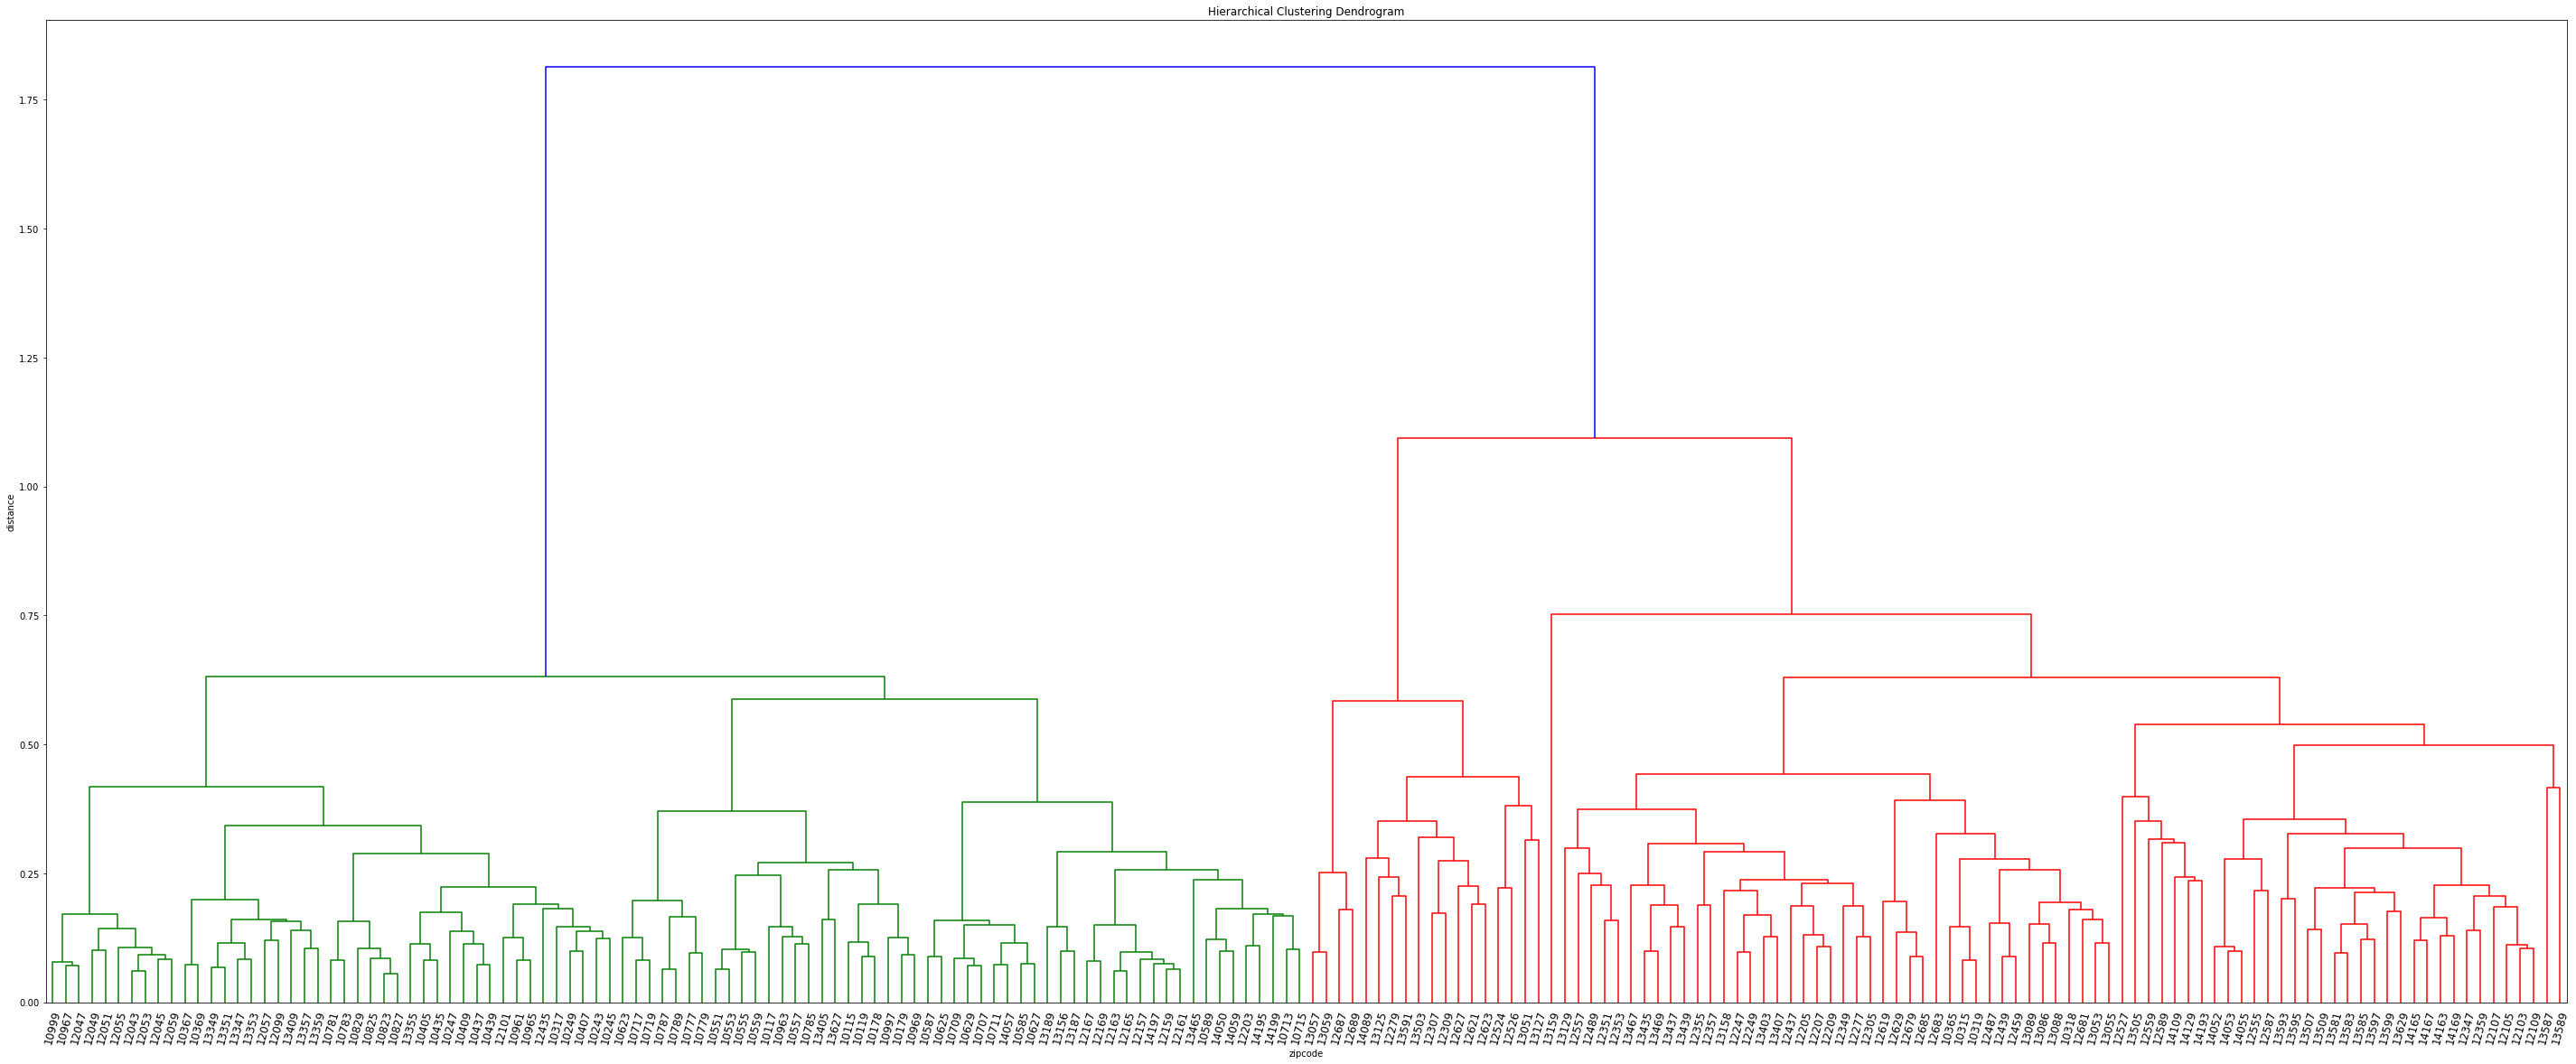

In [48]:
# Show the dendrogram and find the number of clusters
%matplotlib inline

Berlin_grouped_clustering = Berlin_grouped.drop('Zipcode', 1)

linkage_matrix = linkage(Berlin_grouped_clustering, 'ward')

# calculate full dendrogram
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('zipcode')
plt.ylabel('distance')

#from IPython.core.debugger import Tracer; 
# Tracer()()
dendrogram(
    linkage_matrix,
    #p=30, truncate_mode='lastp',
    labels=list ( Berlin_grouped['Zipcode']) ,
    leaf_rotation=75,  # rotates the x axis labels
    leaf_font_size=12  # font size for the x axis labels
    )

print('Double-click to maximize or minimize the plot and see the zipcodes on the x-axis!')
plt.show()

The dendogram shows a specific hierarchical structure. For a sparse parametrization, I use seven clusters (count the vertical lines at some offset over the horizotal line). I decided for two large green clusters (on the left in the dendrogram) and five red clusters (on the right in the dendrogram). With this number of clusters, I run the hierarchical cluster analysis to label each zipcode with a cluster-label of one to seven.

In [49]:
print('See the results of the clusterin in column "Cluster Labels" and the corresponding zipcodes for plausibility checks!')
display( Berlin_merged.head() )

See the results of the clusterin in column "Cluster Labels" and the corresponding zipcodes for plausibility checks!


Zipcode  Cluster Labels  latitude  longitude Borough 1st Most Common Venue  \
0    10115               2   52.5323    13.3846   Mitte           Coffee Shop   
1    10117               2   52.5170    13.3872   Mitte                 Hotel   
2    10119               2   52.5305    13.4053   Mitte    Italian Restaurant   
3    10178               2   52.5213    13.4096   Mitte                 Hotel   
4    10179               2   52.5122    13.4164   Mitte           Coffee Shop   

  2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0    Italian Restaurant                  Hotel        Ice Cream Shop   
1        History Museum    Monument / Landmark           Art Gallery   
2           Coffee Shop               Beer Bar             Bookstore   
3           Coffee Shop  Vietnamese Restaurant        Ice Cream Shop   
4                 Hotel                   Café                   Bar   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Japanese Restaurant             Bookstore           Art Gallery   
1                  Plaza             Bookstore          Concert Hall   
2  Vietnamese Restaurant                 Hotel        Sandwich Place   
3         History Museum             Bookstore    Italian Restaurant   
4     Turkish Restaurant   Indie Movie Theater        History Museum   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Bakery          Cocktail Bar         Sandwich Place  
1           Coffee Shop        Clothing Store         Chocolate Shop  
2          Cocktail Bar        Ice Cream Shop      German Restaurant  
3        Sandwich Place   Indie Movie Theater                   Café  
4     German Restaurant    Italian Restaurant             Art Museum

#### Show the clustered zipcodes in a map

In [50]:
#show clustered zips of berlin
Map_Berlin_clustered

The map of the clustered locations show some geographical structure. Double-click and zoom in the map.

*Cluster 1* and *Cluster 2* (purple, blue) lie in the center of Berlin - predominantly more in the east respectively in the west. 
*Cluster 3* (cyan) is mainly located in southwest. 
Cluster 4* and *Cluster 6* (bright green, orange) are outside of the inner circle. *Cluster 5* (dark yellow) spands from the north over the east to the south - outside the inner circle, and *Cluster 7* is singular in the north.
Several clusters comprise multiple boroughs such as *Cluster 6* (orange), that contains zipcodes in Reinickendorf, Pankow, Lichtenberg, etc.

#### Describe the results of cluster analysis:

In this section, we present the clusters and determine the venues categories that distinguish the cluster. I analyse the seven clusters in a changed order because of comparability:

##### Results: Cluster1 (purple)

Cluster1 lies in the middle of Berlin, and one might expect more venues for tourism, food, coffee, etc.

In [51]:
Clusters = []

LABEL = 1
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster1 contains 43 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Bar', 'Café', 'Ice Cream Shop', 'Italian Restaurant', 'Middle Eastern Restaurant', 'Vietnamese Restaurant']

Show individual top ten venues categories in cluster1:



Zipcode 1st Most Common Venue          2nd Most Common Venue  \
0     10243    Italian Restaurant                         Bakery   
1     10245                  Café                      Nightclub   
2     10247                  Café                    Pizza Place   
3     10249    Italian Restaurant                           Café   
4     10317                   Bar             Italian Restaurant   
5     10367                  Café                           Park   
6     10369                  Café                    Pizza Place   
7     10405    Italian Restaurant                           Café   
8     10407                  Café             Italian Restaurant   
9     10409                  Café                 Ice Cream Shop   
10    10435                  Café                    Coffee Shop   
11    10437                  Café                    Coffee Shop   
12    10439                  Café                    Coffee Shop   
13    10781                  Café             Italian Restaurant   
14    10783                  Café                   Cocktail Bar   
15    10823                  Café                 Ice Cream Shop   
16    10825                  Café             Italian Restaurant   
17    10827                  Café             Italian Restaurant   
18    10829                  Café             Italian Restaurant   
19    10961    Italian Restaurant                    Coffee Shop   
20    10965    Italian Restaurant                            Bar   
21    10967                  Café                    Coffee Shop   
22    10999                   Bar                           Café   
23    12043                  Café                            Bar   
24    12045           Coffee Shop                            Bar   
25    12047                  Café                    Coffee Shop   
26    12049                   Bar                           Café   
27    12051                   Bar                           Café   
28    12053                   Bar                           Café   
29    12055                  Café                            Bar   
30    12057                  Café                            Bar   
31    12059                  Café                    Coffee Shop   
32    12099                  Café             Italian Restaurant   
33    12101                  Café             Italian Restaurant   
34    12435                  Café                      Nightclub   
35    13347                   Bar                           Café   
36    13349                  Café                            Bar   
37    13351                  Café                            Bar   
38    13353                   Bar                           Café   
39    13355           Coffee Shop  Vegetarian / Vegan Restaurant   
40    13357                   Bar                           Café   
41    13359                  Café                            Bar   
42    13409                  Café                            Bar   

            3rd Most Common Venue          4th Most Common Venue  \
0   Vegetarian / Vegan Restaurant                           Café   
1                  Ice Cream Shop  Vegetarian / Vegan Restaurant   
2                     Coffee Shop             Falafel Restaurant   
3             Indie Movie Theater                    Pizza Place   
4                            Café                         Bakery   
5                             Bar                         Bakery   
6                             Bar                           Park   
7                     Coffee Shop                       Beer Bar   
8           Vietnamese Restaurant                    Coffee Shop   
9             Japanese Restaurant             Italian Restaurant   
10                 Ice Cream Shop                       Beer Bar   
11                            Bar                 Ice Cream Shop   
12          Vietnamese Restaurant                            Bar   
13                          Hotel                    Men's 

The modes show the most frequent venue categories per rank over all zipcode without duplicates. Famous venues categories are: 'Bakery', 'Bar', 'Café', 'Ice Cream Shop' ... For details see table "Top ten venue categories".

##### Results: Cluster2 (blue)

Cluster2 lies in the middle of Berlin like Cluster1. As the dendrogram implies, Cluster1 and Cluster2 share some specific similarities and have specific dissimmilarities.

In [52]:
LABEL = 2
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster2 contains 23 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Art Museum', 'Bakery', 'Bookstore', 'Café', 'Cocktail Bar', 'Coffee Shop', 'German Restaurant', 'History Museum', 'Hotel', 'Ice Cream Shop', 'Italian Restaurant', 'Japanese Restaurant', 'Movie Theater', 'Park', 'Plaza', 'Turkish Restaurant']

Show individual top ten venues categories in cluster2:



Zipcode 1st Most Common Venue 2nd Most Common Venue  \
0     10115           Coffee Shop    Italian Restaurant   
1     10117                 Hotel        History Museum   
2     10119    Italian Restaurant           Coffee Shop   
3     10178                 Hotel           Coffee Shop   
4     10179           Coffee Shop                 Hotel   
5     10551                  Café                   Bar   
6     10553                  Café                 Hotel   
7     10555                 Hotel                  Café   
8     10557                 Hotel                  Park   
9     10559                 Hotel                  Café   
10    10623                 Hotel     German Restaurant   
11    10717                 Hotel     German Restaurant   
12    10719                 Hotel     German Restaurant   
13    10777                 Hotel          Cocktail Bar   
14    10779                 Hotel                  Café   
15    10785                 Hotel   Monument / Landmark   
16    10787                 Hotel           Zoo Exhibit   
17    10789                 Hotel           Zoo Exhibit   
18    10963                 Hotel    Italian Restaurant   
19    10969           Coffee Shop                 Hotel   
20    10997           Coffee Shop                   Bar   
21    13405           Coffee Shop   Rental Car Location   
22    13627           Supermarket           Coffee Shop   

    3rd Most Common Venue       4th Most Common Venue  5th Most Common Venue  \
0                   Hotel              Ice Cream Shop    Japanese Restaurant   
1     Monument / Landmark                 Art Gallery                  Plaza   
2                Beer Bar                   Bookstore  Vietnamese Restaurant   
3   Vietnamese Restaurant              Ice Cream Shop         History Museum   
4                    Café                         Bar     Turkish Restaurant   
5                    Park                 Coffee Shop                  Hotel   
6   Vietnamese Restaurant                         Bar     Turkish Restaurant   
7             Zoo Exhibit       Vietnamese Restaurant                   Park   
8     Monument / Landmark                 Beer Garden           Cocktail Bar   
9                     Bar                        Park            Coffee Shop   
10            Zoo Exhibit          Italian Restaurant          Movie Theater   
11                   Café            Greek Restaurant    Japanese Restaurant   
12                   Café              Breakfast Spot                 Bakery   
13                   Café                 Men's Store            Coffee Shop   
14         Ice Cream Shop                Cocktail Bar                  Plaza   
15           Cocktail Bar                        Café             Art Museum   
16             Art Museum                        Café            Men's Store   
17                   Café           German Restaurant          Movie Theater   
18                    Bar  Modern European Restaurant           Cocktail Bar   
19                    Bar                        Café         History Museum   
20                   Café          Italian Restaurant                 Bakery   
21                Airport              Sandwich Place              BBQ Joint   
22                   Café                 Beer Garden    Rental Car Location   

         6th Most Common Venue  7th Most Common Venue   8th Most Common Venue  \
0                    Bookstore            Art Gallery                  Bakery   
1                    Bookstore           Concert Hall             Coffee Shop   
2                        Hotel         Sandwich Place            Cocktail Bar   
3                    Bookstore     Italian Restaurant          Sandwich Place   
4          Indie Movie Theater         History Museum       German Restaurant   
5                 Cocktail Bar      Indian Restaurant      Turkish Restaurant   
6                  Supermarket       Asian Restaurant                 Taverna   
7                 

The modes shows the most frequent venue categories per rank over all zipcode without duplicates. 

Let's find the simmilarities and dissimmilarities of Cluster1 and Cluster2:

In [53]:
print()
print ('Similarities of Cluster1 and Cluster2:')
print ( set ( Clusters[0][2] ).intersection (set (Clusters[1][2]) ) )
print()
print()


Similarities of Cluster1 and Cluster2:
{'Italian Restaurant', 'Ice Cream Shop', 'Café', 'Bakery'}




In [54]:
print()
print ('Specific for Cluster2:')
print ( set ( Clusters[1][2] ).difference (set (Clusters[0][2]) ) )
print()
print()


Specific for Cluster2:
{'Plaza', 'Park', 'Bookstore', 'Movie Theater', 'Japanese Restaurant', 'Art Museum', 'Coffee Shop', 'German Restaurant', 'History Museum', 'Cocktail Bar', 'Turkish Restaurant', 'Hotel'}




In [55]:
print()
print ('Specific for Cluster1:')
print ( set ( Clusters[0][2] ).difference (set (Clusters[1][2]) ) )
print()
print()


Specific for Cluster1:
{'Vietnamese Restaurant', 'Bar', 'Middle Eastern Restaurant'}




##### Results: Cluster4 (light green)

Cluster4 and Cluster6 encompass the center of Berlin. For both venues, more venue categories concerning living, household, sport, etc. are expected to characterize these areas.

In [56]:
LABEL = 4
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster4 contains 18 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Bus Stop', 'Chinese Restaurant', 'Drugstore', 'Fast Food Restaurant', 'Gym / Fitness Center', 'History Museum', 'Hotel', 'Italian Restaurant', 'Light Rail Station', 'Park', 'Pet Store', 'Supermarket', 'Tram Station']

Show individual top ten venues categories in cluster4:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     12279           Supermarket              Bus Stop    Italian Restaurant   
1     12307           Supermarket                Bakery     German Restaurant   
2     12309           Supermarket    Italian Restaurant          Soccer Field   
3     12524           Supermarket     Electronics Store     Outdoor Sculpture   
4     12526           Supermarket                 Hotel             Drugstore   
5     12621           Supermarket             Drugstore    Italian Restaurant   
6     12623           Supermarket    Italian Restaurant             Drugstore   
7     12627           Supermarket         Metro Station              Bus Stop   
8     12687           Supermarket          Tram Station              Bus Stop   
9     12689           Supermarket          Tram Station            Steakhouse   
10    13051           Supermarket         Shopping Mall          Tram Station   
11    13057           Supermarket          Tram Station          Home Service   
12    13059           Supermarket          Tram Station           Coffee Shop   
13    13125           Supermarket              Bus Stop    Italian Restaurant   
14    13127           Supermarket       Nature Preserve                  Farm   
15    13503           Supermarket      Insurance Office    Light Rail Station   
16    13591           Supermarket              Bus Stop             Drugstore   
17    14089           Supermarket              Bus Stop     Food & Drink Shop   

        4th Most Common Venue   5th Most Common Venue   6th Most Common Venue  \
0        Fast Food Restaurant                    Farm                    Park   
1                    Bus Stop             Gas Station               Drugstore   
2                        Café                  Bakery       German Restaurant   
3   Middle Eastern Restaurant               Drugstore      Miscellaneous Shop   
4   Middle Eastern Restaurant        Greek Restaurant         Auto Dealership   
5                      Bakery           Indie Theater          Ice Cream Shop   
6        Fast Food Restaurant  Furniture / Home Store    Gym / Fitness Center   
7               Shopping Mall               Drugstore       Electronics Store   
8                  Steakhouse               Drugstore        Greek Restaurant   
9               Train Station                Mountain               Pet Store   
10                 Restaurant             Golf Course      Chinese Restaurant   
11               Soccer Field           Train Station          Animal Shelter   
12              Movie Theater          Animal Shelter      Light Rail Station   
13                Art Gallery         Nature Preserve  Furniture / Home Store   
14             Hardware Store            Tram Station               Drugstore   
15          Trattoria/Osteria             Gas Station                  Forest   
16       Fast Food Restaurant       Trattoria/Osteria               Pet Store   
17                       Café             Golf Course           Historic Site   

   7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
0           Soccer Field    Chinese Restaurant                   Diner   
1      Mobile Phone Shop                  Café      Light Rail Station   
2     Miscellaneous Shop  Gym / Fitness Center       Mobile Phone Shop   
3     Light Rail Station                  Park                  Bakery   
4     Light Rail Station         Shopping Mall             Zoo Exhibit   
5                  Hotel                  Lake      Light Rail Station   
6                   Lake                Bakery             Gas Station   
7                  Hotel         Big Box Store    Fast Food Restaurant   
8      Electronics Store           Gas Station      Light Rail Station   
9         Animal Shelter                  Park      Light Rail Station   
10                  Farm    Light Rail Station            Soccer Field   
11              Bus Stop           C

The venue categories differ from cluster1 or cluster2. Some typical venue categories for cluster4 are: 'Bus Stop', 'Gas Station', 'Gym / Fitness Center', 'Bakery', 'Café', 'Drugstore', 'Supermarket', 'Pharmacy'
That supports the expectation. Now consider Cluster6:

##### Results: Cluster6 (orange)

Cluster6 lies outside the center of Berlin, and may share some commonalities with Cluster4, as the dendrogram suggests.

In [57]:
LABEL = 6
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster6 contains 34 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Beer Garden', 'Bus Stop', 'Café', 'Drugstore', 'German Restaurant', 'Greek Restaurant', 'Hotel', 'Italian Restaurant', 'Park', 'Plaza', 'Soccer Field', 'Supermarket']

Show individual top ten venues categories in cluster6:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     12103           Supermarket                  Park                  Café   
1     12105           Supermarket                  Park                  Café   
2     12107           Supermarket    Italian Restaurant                  Park   
3     12109           Supermarket             Drugstore                  Café   
4     12347           Supermarket                  Café         Historic Site   
5     12359           Supermarket                 Hotel                  Park   
6     12527           Gas Station    Italian Restaurant         Boat or Ferry   
7     12555     German Restaurant          Tram Station    Light Rail Station   
8     12559           Supermarket       Harbor / Marina     German Restaurant   
9     12587      Asian Restaurant        Ice Cream Shop           Gas Station   
10    12589     German Restaurant                 Beach           Supermarket   
11    13505     German Restaurant         Boat or Ferry                 Beach   
12    13507             Drugstore                  Café  Fast Food Restaurant   
13    13509           Supermarket            Restaurant    Italian Restaurant   
14    13581              Bus Stop             Drugstore           Supermarket   
15    13583           Supermarket             Drugstore    Italian Restaurant   
16    13585           Supermarket     German Restaurant    Italian Restaurant   
17    13587              Bus Stop                Forest                   Zoo   
18    13589              Bus Stop             Drugstore                  Lake   
19    13593              Bus Stop       Harbor / Marina           Supermarket   
20    13595              Bus Stop           Supermarket           Pizza Place   
21    13597        Soccer Stadium           Supermarket           Pizza Place   
22    13599     German Restaurant              Bus Stop           Supermarket   
23    13629              Bus Stop         Metro Station            Restaurant   
24    14052        Soccer Stadium                 Hotel                 Plaza   
25    14053        Soccer Stadium           Supermarket                  Café   
26    14055        Soccer Stadium                  Café     German Restaurant   
27    14109     German Restaurant           Supermarket       Harbor / Marina   
28    14129                 Beach     German Restaurant           Supermarket   
29    14163           Supermarket    Italian Restaurant                  Café   
30    14165           Supermarket    Italian Restaurant                  Café   
31    14167           Supermarket                  Café    Italian Restaurant   
32    14169                  Café           Supermarket  Gym / Fitness Center   
33    14193     German Restaurant                  Lake         Historic Site   

     4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
0       Italian Restaurant             Drugstore         Gym / Fitness Center   
1       Italian Restaurant             Drugstore             Asian Restaurant   
2               Steakhouse              Bus Stop          Fried Chicken Joint   
3       Italian Restaurant                  Park                       Bakery   
4                 Bus Stop                  Park                  Gas Station   
5     Gym / Fitness Center          Soccer Field         Fast Food Restaurant   
6             Tram Station    Light Rail Station            German Restaurant   
7                     Café             Drugstore            Electronics Store   
8            Bowling Alley                 Beach          American Restaurant   
9        Trattoria/Osteria          Tram Station                Train Station   
10      Light Rail Station    Seafood Restaurant                 Neighborhood   
11                    Café             Gastropub                  Gas Station   
12           Shopping Mall        Sandwich Place               Clothing Store   
13           Metro Station     Ger

Regarding the modes of the top ranked venue categories, we find a lot of expected venue categories: 'Bakery', 'Bus Stop', 'Café', 'Drugstore', 'Gas Station', 'Gym / Fitness Center', 'Park', 'Supermarket'.  Let's find the simmilarities and dissimmilarities of Cluster4 and Cluster6.

In [58]:
print()
print ('Similarities of Cluster4 and Cluster6:')
print ( set ( Clusters[2][2] ).intersection (set (Clusters[3][2]) ) )
print()
print()


Similarities of Cluster4 and Cluster6:
{'Park', 'Italian Restaurant', 'Supermarket', 'Bus Stop', 'Hotel', 'Drugstore'}




In [59]:
print()
print ('Specific for Cluster6:')
print ( set ( Clusters[2][2] ).difference (set (Clusters[3][2]) ) )
print()
print()


Specific for Cluster6:
{'Tram Station', 'Bakery', 'Fast Food Restaurant', 'Pet Store', 'Gym / Fitness Center', 'History Museum', 'Chinese Restaurant', 'Light Rail Station'}




In [60]:
print()
print ('Specific for Cluster4:')
print ( set ( Clusters[3][2] ).difference (set (Clusters[2][2]) ) )
print()
print()


Specific for Cluster4:
{'Plaza', 'Beer Garden', 'Greek Restaurant', 'Soccer Field', 'German Restaurant', 'Café'}




##### Results: Cluster5 (dark yellow)

Regionally, cluster5 is next to cluster4 in the suburbs of Berlin. There should be some simmilarities to cluster4.

In [61]:
LABEL = 5
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster5 contains 42 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Drugstore', 'Greek Restaurant', 'Italian Restaurant', 'Light Rail Station', 'Park', 'Supermarket']

Show individual top ten venues categories in cluster5:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     10315           Supermarket           Zoo Exhibit                Bakery   
1     10318           Supermarket          Tram Station             Drugstore   
2     10319           Supermarket                Bakery             Drugstore   
3     10365           Supermarket                Bakery           Coffee Shop   
4     12205           Supermarket    Italian Restaurant              Bus Stop   
5     12207           Supermarket              Bus Stop             Drugstore   
6     12209           Supermarket              Bus Stop    Italian Restaurant   
7     12247           Supermarket                  Park    Italian Restaurant   
8     12249           Supermarket    Italian Restaurant             Drugstore   
9     12277           Supermarket    Italian Restaurant    Chinese Restaurant   
10    12305           Supermarket    Italian Restaurant    Light Rail Station   
11    12349           Supermarket    Italian Restaurant              Bus Stop   
12    12351           Supermarket     German Restaurant           Gas Station   
13    12353           Supermarket  Fast Food Restaurant              Bus Stop   
14    12355           Supermarket    Italian Restaurant             Drugstore   
15    12357           Supermarket         Metro Station    Italian Restaurant   
16    12437           Supermarket              Bus Stop             Drugstore   
17    12439           Supermarket                  Café             Drugstore   
18    12459           Supermarket             Drugstore                  Café   
19    12487           Supermarket                Forest             Drugstore   
20    12489           Supermarket                 Hotel                  Café   
21    12557           Supermarket                  Café     German Restaurant   
22    12619           Supermarket                Garden                 Plaza   
23    12629           Supermarket                Garden          Tram Station   
24    12679           Supermarket                Garden          Tram Station   
25    12681           Supermarket          Tram Station             Drugstore   
26    12683           Zoo Exhibit           Supermarket             Drugstore   
27    12685           Supermarket          Tram Station                Garden   
28    13053           Supermarket          Tram Station  Fast Food Restaurant   
29    13055          Tram Station           Supermarket                 Hotel   
30    13086           Supermarket                  Café     German Restaurant   
31    13088           Supermarket          Tram Station     German Restaurant   
32    13089           Supermarket          Tram Station             Drugstore   
33    13129           Gas Station           Supermarket             Pet Store   
34    13158           Supermarket          Tram Station                  Park   
35    13403           Supermarket              Bus Stop                Bakery   
36    13407           Supermarket                  Park         Metro Station   
37    13435           Supermarket    Italian Restaurant  Gym / Fitness Center   
38    13437           Supermarket    Light Rail Station  Gym / Fitness Center   
39    13439           Supermarket              Bus Stop    Athletics & Sports   
40    13467           Supermarket    Italian Restaurant      Sushi Restaurant   
41    13469           Supermarket  Fast Food Restaurant  Gym / Fitness Center   

          4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0                     Drugstore                   Hotel                  Park   
1            Italian Restaurant                  Bakery                  Café   
2                   Zoo Exhibit             Pizza Place    Italian Restaurant   
3                          Park               Drugstore                 Hotel   
4                     Drugstore                    Café        Ice Cream Shop   
5            Italian Restaurant   

A lot of the top ranked venue categories of cluster5 are not typical for cluster1 or cluster2. But some of those categories are part of the top categories in cluster4.

##### Results: Cluster3 (cyan)

Cluster3 is in the west of Berlin.

In [62]:
LABEL = 3
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster3 contains 29 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Ice Cream Shop', 'Italian Restaurant', 'Korean Restaurant', 'Park', 'Supermarket', 'Thai Restaurant', 'Trattoria/Osteria', 'Vietnamese Restaurant']

Show individual top ten venues categories in cluster3:



Zipcode 1st Most Common Venue 2nd Most Common Venue  \
0     10585                  Café    Italian Restaurant   
1     10587                 Hotel                  Café   
2     10589                  Café           Coffee Shop   
3     10625     German Restaurant                 Hotel   
4     10627                  Café    Italian Restaurant   
5     10629    Italian Restaurant                  Café   
6     10707    Italian Restaurant     German Restaurant   
7     10709    Italian Restaurant                 Hotel   
8     10711    Italian Restaurant                  Café   
9     10713    Italian Restaurant                Bakery   
10    10715                  Café    Italian Restaurant   
11    12157                  Café    Italian Restaurant   
12    12159                  Café        Ice Cream Shop   
13    12161                  Café        Ice Cream Shop   
14    12163                  Café        Ice Cream Shop   
15    12165                  Café        Ice Cream Shop   
16    12167           Supermarket        Ice Cream Shop   
17    12169                  Café        Ice Cream Shop   
18    12203                  Café    Italian Restaurant   
19    13156                  Café           Supermarket   
20    13187                  Café           Supermarket   
21    13189                  Café    Italian Restaurant   
22    13465                  Café     German Restaurant   
23    14050                  Café    Italian Restaurant   
24    14057                  Café    Italian Restaurant   
25    14059                  Café    Italian Restaurant   
26    14195    Italian Restaurant     German Restaurant   
27    14197                  Café    Italian Restaurant   
28    14199    Italian Restaurant                  Café   

    3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue  \
0   Vietnamese Restaurant       Asian Restaurant           Gourmet Shop   
1              Art Museum  Vietnamese Restaurant     Chinese Restaurant   
2      Italian Restaurant       Asian Restaurant      Trattoria/Osteria   
3      Italian Restaurant     Chinese Restaurant  Vietnamese Restaurant   
4       German Restaurant  Vietnamese Restaurant           Gourmet Shop   
5       German Restaurant  Vietnamese Restaurant                  Hotel   
6                   Hotel         Breakfast Spot                   Café   
7          Breakfast Spot                   Café      German Restaurant   
8       German Restaurant  Vietnamese Restaurant                 Bakery   
9                    Park                   Café       Greek Restaurant   
10         Ice Cream Shop      German Restaurant                 Bakery   
11         Ice Cream Shop   Gym / Fitness Center       Sushi Restaurant   
12     Italian Restaurant                 Bakery  Vietnamese Restaurant   
13     Italian Restaurant       Sushi Restaurant                   Park   
14     Italian Restaurant       Sushi Restaurant  Vietnamese Restaurant   
15     Italian Restaurant                   Park            Supermarket   
16                   Café     Italian Restaurant       Sushi Restaurant   
17            Supermarket                   Park       Sushi Restaurant   
18      German Restaurant         Ice Cream Shop            Supermarket   
19                   Park              Drugstore                 Bakery   
20                 Bakery                   Park              Drugstore   
21                    Bar              Drugstore     Chinese Restaurant   
22                   Park            Supermarket     Italian Restaurant   
23            Supermarket      Trattoria/Osteria             Art Museum   
24      German Restaurant  Vietnamese Restaurant        Thai Restaurant   
25      Trattoria/Osteria  Vietnamese Restaurant      German Restaurant   
26                   Café                 Bakery            Supermarket   
27            Supermarket         Ice Cream Shop       Greek Restaurant   
28      Trattoria/Osteria                  Hotel          

The modes show the most frequent venue categories per rank over all zipcode without duplicates. Some famous venues categories encompass public transport, free time, etc.

##### Results: Cluster7 (red)

Cluster7 lies in the north of Berlin.

In [63]:
LABEL = 7
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster7 contains 1 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bus Stop', 'Dog Run', 'Ethiopian Restaurant', 'Event Service', 'Event Space', 'Fabric Shop', 'Fair', 'Farm', 'Fast Food Restaurant', 'Lake']

Show individual top ten venues categories in cluster7:



Zipcode 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    13159                  Lake              Bus Stop               Dog Run   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Farm  Fast Food Restaurant  Ethiopian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Event Service           Event Space           Fabric Shop   

  10th Most Common Venue  
0                   Fair

This analysis shows that cluster a not randomly distributed in Berlin. Clusters are located in specific areas. This regional structure of the clusters correspond to similar structure of the venues. The most important venue categories differ between the inner city clusters and clusters in the suburbs. 

Summary of similar clusters:

    cluster1, cluster2 -> inner circle of Berlin
    cluster3, cluster4, cluster6, cluster5 -> around the inner circle of Berlin
    cluster7 -> rare observations

The top ranked venue categories of the clusters appear plausible for the location of most clusters. The structure appears to be relativ robust. Observations for cluster3 and cluster7 are rare. This might relate to outliers.

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
#### 3. Socio-demographic features

There are a lot of features, that have an informativ value for people moving to Berlin. Just to show some examples the following feature show some valueable insights regarding the standard of living at various locations. The data is on the level of boroughs. 

In [64]:
Data_merged

inhabitant per physician  rate of academics (%)  \
Borough                                                                       
Mitte                                        1226.71                  30.69   
Friedrichshain-Kreuzberg                     1347.80                  35.28   
Pankow                                       1428.65                  31.52   
Charlottenburg-Wilmersdorf                    774.21                  33.28   
Spandau                                      1732.80                  12.10   
Steglitz-Zehlendorf                          1130.62                  31.74   
Tempelhof-Schöneberg                         1259.49                  24.40   
Neukölln                                     1880.18                  17.32   
Treptow-Köpenick                             1747.56                  22.02   
Marzahn-Hellersdorf                          1630.64                  14.54   
Lichtenberg                                  1776.16                  18.11   
Reinickendorf                                1659.71                  16.88   

                            rate of unemployment (%)  house price (€/sqrmeter)  
Borough                                                                         
Mitte                                           7.69                   5669.80  
Friedrichshain-Kreuzberg                        6.76                   4962.23  
Pankow                                          5.04                   4158.95  
Charlottenburg-Wilmersdorf                      5.69                   5718.16  
Spandau                                         8.07                   3011.25  
Steglitz-Zehlendorf                             4.30                   4881.08  
Tempelhof-Schöneberg                            6.19                   3753.88  
Neukölln                                        8.63                   3657.35  
Treptow-Köpenick                                5.43                   3561.21  
Marzahn-Hellersdorf                             6.18                   3034.21  
Lichtenberg                                     6.24                   3628.78  
Reinickendorf                                   6.24                   3388.74

The succeeding plots draw comparison with the situation in different boroughs.

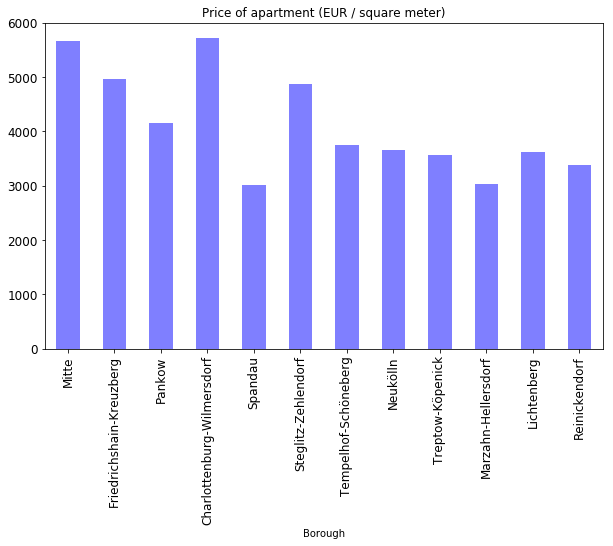

In [65]:
figS1

<p style="text-align:justify">
The feature "price of apartment" indicates the price of buying a flat in EUR per square meter on average for each borough. Obviously, the boroughs "Mitte" and "Charlottenbourg-Wilmersdorf" are most expensive. One who buys an apartment in Charlottenbourg might be associated with higher personal income. "Charlottenbourg-Wilmersdorf" is next to the middle of Berlin and is rich in respect of the culture. The standard of living is supposed to be higher. "Spandau" shows the lowest prices per square meter on average. That can relate to a lower standard of living.

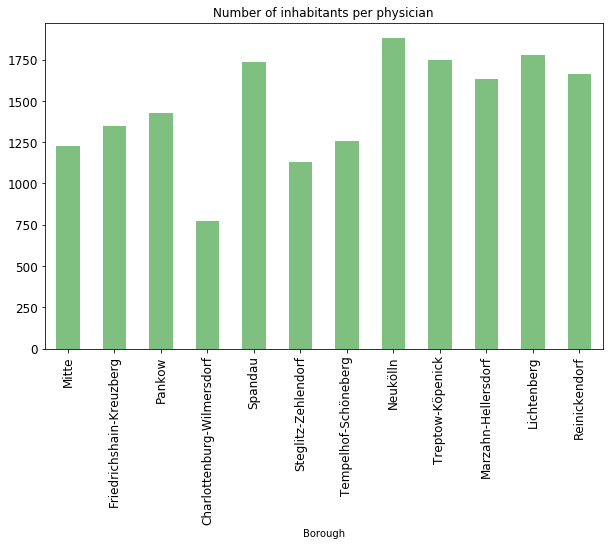

In [66]:
figS2

<p style="text-align:justify">
The feature "Number of inhabitants per physician" describes the density of all kind of physicians (sum of general medicin, specialized, dentist). In boroughs with lower numbers phyicians have more time for curation of their paients. This might relate to the wealthiness of the inhabitants. In this sense, the wealthy borough "Charlottenbourg-Wilmersdorf" has the highest number of physicians per inhabitans ( - that's the inverse of the feature "number of inhabitans per physician"). The poorer borough "Spandau" has less physicians per inhabitans. 

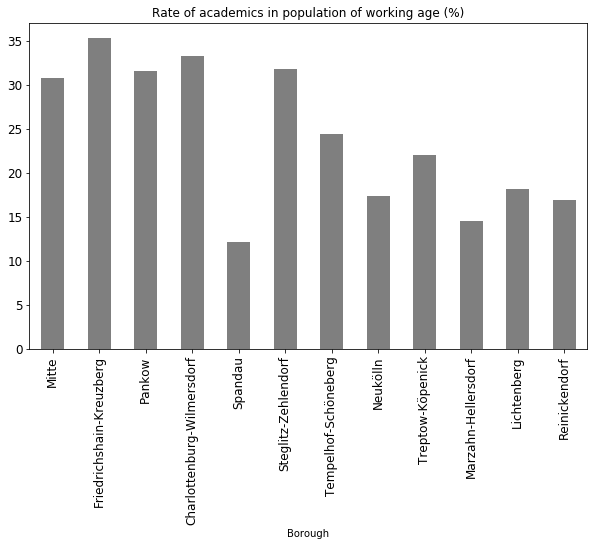

In [67]:
figS3

<p style="text-align:justify">

The feature "Rate of academics in the population of working age" is a very general indicator, that counts the relative number of people who have a university degree. This might relate to the socio-demographic structure of inhabitants. Following the examples, "Charlottenbourg-Wilmersdorf" fraction of academics is high in comparison to "Spandau". That supports expectations.

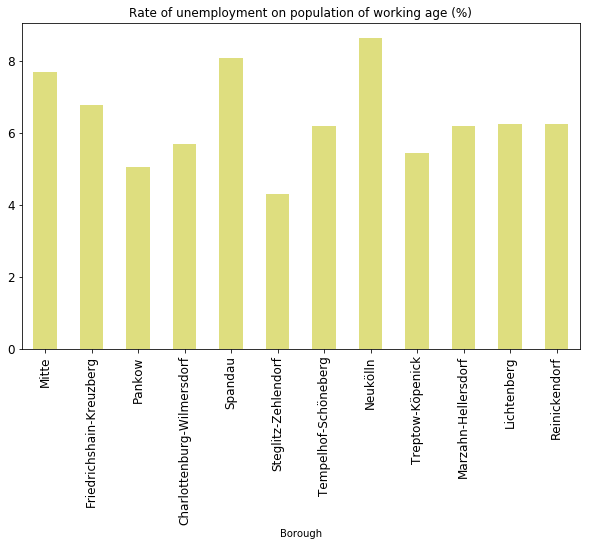

In [68]:
figS4

<p style="text-align:justify">

The feature "Rate of unemployment on population of working age" describes the economic structure of boroughs. This indiactor is known fluctuate saisonally and by economic cycle. "Charlottenbourg-Wilmersdorf shows a lower degree of unemployment, whereas  "Spandau" exhibits higher unemployment.


This feature illustrate the analysis of a selection of possible feature, describing the environment in the boroughs. The shown interpretations seem to be obvious. Those feature might represent necessary information concerning when someone considers to move to Berlin. Next, we show a simple fasility to request trending venues that attract people of Berlin and is even interesing for people who migrate.

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
#### 4. Trending venues

For the reason of consistency, we extract trending venues at each zipcode in "Charlottenbourg-Wilmersdorf" and "Spandau":

In [86]:
Selected_zipcodes1 = Berlin_mapped.loc[Berlin_mapped.Borough=='Charlottenburg-Wilmersdorf', :]
Selected_zipcodes1 = Selected_zipcodes1.head(3)
Selected_zipcodes1

zipcode   state  latitude  longitude                     Borough
27    10585  Berlin   52.5152    13.3057  Charlottenburg-Wilmersdorf
28    10587  Berlin   52.5184    13.3195  Charlottenburg-Wilmersdorf
29    10589  Berlin   52.5276    13.3057  Charlottenburg-Wilmersdorf

In [70]:
display(HTML('<H2>Survey in "Charlottenburg-Wilmersdorf" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes1.loc[:,'zipcode'],
    Selected_zipcodes1.loc[:,'latitude'],
    Selected_zipcodes1.loc[:,'longitude'],
    Selected_zipcodes1.loc[:,'Borough']);

----------------------------------------


----------------------------------------


----------------------------------------


In [87]:
Selected_zipcodes2 = Berlin_mapped.loc[Berlin_mapped.Borough=='Spandau', :]
Selected_zipcodes2 = Selected_zipcodes2.head(3)
Selected_zipcodes2

zipcode   state  latitude  longitude  Borough
161    13581  Berlin   52.5310    13.1794  Spandau
162    13583  Berlin   52.5437    13.1824  Spandau
163    13585  Berlin   52.5477    13.2049  Spandau

In [85]:
Berlin_merged[Berlin_merged['Borough']=='Charlottenburg-Wilmersdorf'].groupby('Cluster Labels').count()
#df[ df[‘Spaltenname‘] >=30 ]

Zipcode  latitude  longitude  Borough  1st Most Common Venue  \
Cluster Labels                                                                 
1                     1         1          1        1                      1   
2                     6         6          6        6                      6   
3                    17        17         17       17                     17   
6                     6         6          6        6                      6   

                2nd Most Common Venue  3rd Most Common Venue  \
Cluster Labels                                                 
1                                   1                      1   
2                                   6                      6   
3                                  17                     17   
6                                   6                      6   

                4th Most Common Venue  5th Most Common Venue  \
Cluster Labels                                                 
1                                   1                      1   
2                                   6                      6   
3                                  17                     17   
6                                   6                      6   

                6th Most Common Venue  7th Most Common Venue  \
Cluster Labels                                                 
1                                   1                      1   
2                                   6                      6   
3                                  17                     17   
6                                   6                      6   

                8th Most Common Venue  9th Most Common Venue  \
Cluster Labels                                                 
1                                   1                      1   
2                                   6                      6   
3                                  17                     17   
6                                   6                      6   

                10th Most Common Venue  
Cluster Labels                          
1                                    1  
2                                    6  
3                                   17  
6                                    6

In [72]:
display(HTML('<H2>Survey in "Spandau" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes2.loc[:,'zipcode'],
    Selected_zipcodes2.loc[:,'latitude'],
    Selected_zipcodes2.loc[:,'longitude'],
    Selected_zipcodes2.loc[:,'Borough']);

----------------------------------------


----------------------------------------


----------------------------------------


These information about trending venues are a good starting point to look for a flat or apartment. 

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3e"></a>
<h2>E. Discussion</h2>

<p style="text-align:justify">
The results of the cluster analysis concerning the structures of venues and the comparison of socio-demographic features show clear interpretation. This can be related to distinct areas in Berlin. The clusters do not correspond to the shape of the boroughs. But the distribution of the clustered areas have a plausible interpretation. We can separate clusters in the inner circle of Berlin from clusters outside this circle. Nevertheless, some clusters have rare data points that might indicate outliers. From a technical point of view, the Foursquare API promises the delivery of "trending venues". An earlier implementation showed no outcomes. Therefore we utilize the Yelp API in order to obtain top rated venues at given zipcodes. This supports people who are about to move to specific locations in Berlin.

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3f"></a>
<h2>F. Conclusion</h2>

<p style="text-align:justify">
This project illustrates how measures of data science support a systematic analysis of neighborhoods. For the analysis we implement arious data sources and analysis methods. The results show differences in a lot of respects.
A hierarchical cluster analysis classifies zipcodes into seven distinct clusters. A cluster is grouped by zipcodes with  a similar structure of venues. A comparison of clusters show clear differences in the venues structures that can be related to specific areas in Berlin. Further, this project implements several external data sources to describe important socio-demographic features for each borough, such as rate of unemployment, rate of academics, number of physicians per inhabitant, and prices for buying apartments. Further, we consider the examples  "Charlottenbourg-Wilmersdorf" and "Spandau" as boroughs of Berlin. The main interpretation of the analyzed features indicates different levels of wealthiness and standard of living. As the project problem is clearly not a comparison of locations in several respects. The task of the project is to support peoples who consider moving to Berlin. If such a subject finds a suitable selection of possible locations, this project supports by showing top rated venues for those locations. The next step is to engage the service of a real-estate or letting agent to find a place to live.